# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras. 

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Logistic Regression***, ***Random Forest Classifier***, ***XGBoost Classifier***, ***ANN***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Distance Based and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data
- Built XGBoost Classifier, Evaluate Model Performance and Predict Test Data
- Built ANN Classifier, Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Best Model
- Save and Export Variables
- Deploy best model via Streamlit

## Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [174]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "notebook"

#To display the plots
# %matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, plot_confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix

from sklearn.pipeline import Pipeline

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid", {'axes.grid' : False})

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 200)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [175]:
df = pd.read_csv("HR_Dataset.csv")

In [176]:
df_copy = df.copy()

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Moreover, you can find the average of both the groups using groupby() and mean() function.

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [178]:
# cleaning column names

from skimpy import clean_columns
df = clean_columns(df)
df.columns

2 column names have been cleaned

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [179]:
# changing the position of "left" column in df

df = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 
       'promotion_last_5years', 'departments', 'salary','left']]

In [180]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years departments  \
0                   3              0                      0       sales   
1                   6              0                      0       sales   
2                   4              0                      0       sales   
3                   5              0                      0       sales   
4                   3              0                      0       sales   

   salary  left  
0     low     1  
1  medium     1  
2  medium     1  
3     low     1  
4     low     1

In [181]:
df.tail()

satisfaction_level  last_evaluation  number_project  \
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  work_accident  \
14994                   151                   3              0   
14995                   160                   3              0   
14996                   143                   3              0   
14997                   280                   4              0   
14998                   158                   3              0   

       promotion_last_5years departments salary  left  
14994                      0     support    low     1  
14995                      0     support    low     1  
14996                      0     support    low     1  
14997                      0     support    low     1  
14998                      0     support    low     1

In [182]:
df.sample(20)

satisfaction_level  last_evaluation  number_project  \
8971                 0.58             0.54               3   
2999                 0.83             0.77               3   
12247                0.46             0.49               2   
9470                 0.75             0.59               3   
9392                 0.50             0.97               2   
8298                 0.92             0.61               4   
2848                 0.53             0.92               3   
5379                 0.50             0.70               5   
6010                 0.59             0.59               3   
3113                 0.98             0.84               3   
9611                 1.00             0.84               3   
9989                 0.54             0.76               5   
3910                 0.67             0.72               4   
3105                 0.24             0.70               5   
251                  0.79             0.92               5   
4902                 0.21             0.77               6   
10660                0.83             0.74               4   
10714                0.14             0.66               5   
4529                 0.52             0.67               3   
11510                0.47             0.43               4   

       average_montly_hours  time_spend_company  work_accident  \
8971                    287                   6              0   
2999                    228                   3              0   
12247                   148                   3              0   
9470                    242                   3              0   
9392                    252                   4              0   
8298                    252                   2              0   
2848                    207                   4              1   
5379                    264                   2              0   
6010                    194                   2              1   
3113                    286                   4              0   
9611                    227                   3              0   
9989                    226                   2              0   
3910                    159                   2              0   
3105                    147                   6              1   
251                     254                   6              0   
4902                    215                   4              0   
10660                   249                   2              0   
10714                   281                   4              1   
4529                    244                   3              0   
11510                   246                   3              0   

       promotion_last_5years departments  salary  left  
8971                       0   technical  medium     0  
2999                       0       sales  medium     0  
12247                      0       sales     low     1  
9470                       0   marketing  medium     0  
9392                       0  management  medium     0  
8298                       0     support  medium     0  
2848                       0       sales     low     0  
5379                       0   technical     low     0  
6010                       0     support  medium     0  
3113                       0   technical  medium     0  
9611                       0          IT     low     0  
9989                       0          IT     low     0  
3910                       0       sales     low     0  
3105                       0     support  medium     0  
251                        0       sales     low     1  
4902                       0       sales  medium     0  
10660                      0     support  medium     0  
10714                      0  accounting  medium     0  
4529                       0       sales     low     0  
11510                      0     support     low     0

In [183]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
promotion_last_5years    0
departments              0
salary                   0
left                     0
dtype: int64

In [184]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
work_accident              2
promotion_last_5years      2
departments               10
salary                     3
left                       2
dtype: int64

In [185]:
def first_look(col):
    print('column name : ', col)
    print('--------------------------------')
    print('Percent_of_Nulls   : ', '%', round(df[col].isnull().sum() / df.shape[0]*100, 2))
    print('Number_of_Nulls   : ', df[col].isnull().sum())
    print('Number_of_Uniques : ', df[col].nunique())
    print()
    print(f"Value_counts of {col} column:\n", "--"*20,"\n", df[col].value_counts(dropna = False).head(10))
    print()
    if df[col].dtypes == "O" :
        print(f"Value_counts of {col} column with sort_index : \n", "--"*20,"\n", df[col].value_counts(dropna = False).sort_index(key = lambda x : x.str.lower()).head(10))
    else :
        print(f"Value_counts of {col} column with sort_index : \n", "--"*20,"\n", df[col].value_counts(dropna = False).sort_index().head(10))
    print()

In [186]:
for col in df.columns :
    first_look(col)

column name :  satisfaction_level
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  92

Value_counts of satisfaction_level column:
 ---------------------------------------- 
 0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
0.73    246
0.78    241
0.37    241
0.82    241
0.89    237
Name: satisfaction_level, dtype: int64

Value_counts of satisfaction_level column with sort_index : 
 ---------------------------------------- 
 0.09    195
0.10    358
0.11    335
0.12     30
0.13     54
0.14     73
0.15     76
0.16     79
0.17     72
0.18     63
Name: satisfaction_level, dtype: int64

column name :  last_evaluation
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  65

Value_counts of last_evaluation column:
 ---------------------------------------- 
 0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
0.49    332
0.87    326
0.53    324
0.56    322
0.85    316
N

In [187]:
# descriptive statistics for numeric columns

df.describe().T

count   mean   std   min    25%    50%    75%    max
satisfaction_level    14999.00   0.61  0.25  0.09   0.44   0.64   0.82   1.00
last_evaluation       14999.00   0.72  0.17  0.36   0.56   0.72   0.87   1.00
number_project        14999.00   3.80  1.23  2.00   3.00   4.00   5.00   7.00
average_montly_hours  14999.00 201.05 49.94 96.00 156.00 200.00 245.00 310.00
time_spend_company    14999.00   3.50  1.46  2.00   3.00   3.00   4.00  10.00
work_accident         14999.00   0.14  0.35  0.00   0.00   0.00   0.00   1.00
promotion_last_5years 14999.00   0.02  0.14  0.00   0.00   0.00   0.00   1.00
left                  14999.00   0.24  0.43  0.00   0.00   0.00   0.00   1.00

In [188]:
# descriptive statistics for categorical columns

df.describe(include="O").T

count unique    top  freq
departments  14999     10  sales  4140
salary       14999      3    low  7316

In [189]:
df.groupby("left").describe()

satisfaction_level                                    last_evaluation  \
                  count mean  std  min  25%  50%  75%  max           count   
left                                                                         
0              11428.00 0.67 0.22 0.12 0.54 0.69 0.84 1.00        11428.00   
1               3571.00 0.44 0.26 0.09 0.13 0.41 0.73 0.92         3571.00   

                                        number_project                      \
     mean  std  min  25%  50%  75%  max          count mean  std  min  25%   
left                                                                         
0    0.72 0.16 0.36 0.58 0.71 0.85 1.00       11428.00 3.79 0.98 2.00 3.00   
1    0.72 0.20 0.45 0.52 0.79 0.90 1.00        3571.00 3.86 1.82 2.00 2.00   

                    average_montly_hours                                    \
      50%  75%  max                count   mean   std    min    25%    50%   
left                                                                         
0    4.00 4.00 6.00             11428.00 199.06 45.68  96.00 162.00 198.00   
1    4.00 6.00 7.00              3571.00 207.42 61.20 126.00 146.00 224.00   

                   time_spend_company                                      \
        75%    max              count mean  std  min  25%  50%  75%   max   
left                                                                        
0    238.00 287.00           11428.00 3.38 1.56 2.00 2.00 3.00 4.00 10.00   
1    262.00 310.00            3571.00 3.88 0.98 2.00 3.00 4.00 5.00  6.00   

     work_accident                                    promotion_last_5years  \
             count mean  std  min  25%  50%  75%  max                 count   
left                                                                          
0         11428.00 0.18 0.38 0.00 0.00 0.00 0.00 1.00              11428.00   
1          3571.00 0.05 0.21 0.00 0.00 0.00 0.00 1.00               3571.00   

                                         
     mean  std  min  25%  50%  75%  max  
left                                     
0    0.03 0.16 0.00 0.00 0.00 0.00 1.00  
1    0.01 0.07 0.00 0.00 0.00 0.00 1.00

In [190]:
df.groupby("left").describe(include="O")

departments                     salary                  
           count unique    top  freq  count unique  top  freq
left                                                         
0          11428     10  sales  3126  11428      3  low  5144
1           3571     10  sales  1014   3571      3  low  2172

In [191]:
# checking duplicates

df.duplicated().sum()

3008

In [192]:
# checking the percentage of duplicates in df

df.duplicated().sum()/df.shape[0]

0.2005467031135409

In [193]:
# # dropping duplicates

# df = df.drop_duplicates().reset_index(drop=True)

> We have seen that machine learning models give better results when we do not drop duplicate rows. Therefore, we will continue throughout the notebook without dropping duplicates.

In [194]:
df.shape

(14999, 10)

In [195]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count            14999.00         14999.00        14999.00   
mean                 0.61             0.72            3.80   
std                  0.25             0.17            1.23   
min                  0.09             0.36            2.00   
25%                  0.44             0.56            3.00   
50%                  0.64             0.72            4.00   
75%                  0.82             0.87            5.00   
max                  1.00             1.00            7.00   

       average_montly_hours  time_spend_company  work_accident  \
count              14999.00            14999.00       14999.00   
mean                 201.05                3.50           0.14   
std                   49.94                1.46           0.35   
min                   96.00                2.00           0.00   
25%                  156.00                3.00           0.00   
50%                  200.00                3.00           0.00   
75%                  245.00                4.00           0.00   
max                  310.00               10.00           1.00   

       promotion_last_5years     left  
count               14999.00 14999.00  
mean                    0.02     0.24  
std                     0.14     0.43  
min                     0.00     0.00  
25%                     0.00     0.00  
50%                     0.00     0.00  
75%                     0.00     0.00  
max                     1.00     1.00

## Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

*Feel free to add more visualization

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

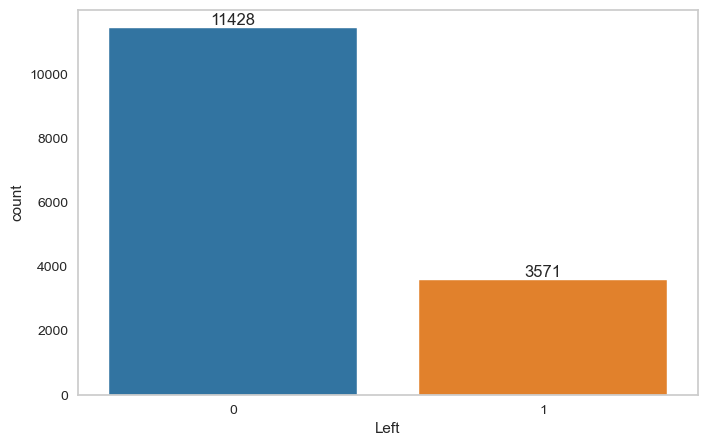

In [196]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="left", data=df, palette="tab10")
plt.xlabel("Left")
ax.bar_label(ax.containers[0]);

In [197]:
df.left.value_counts(normalize=True)

0   0.76
1   0.24
Name: left, dtype: float64

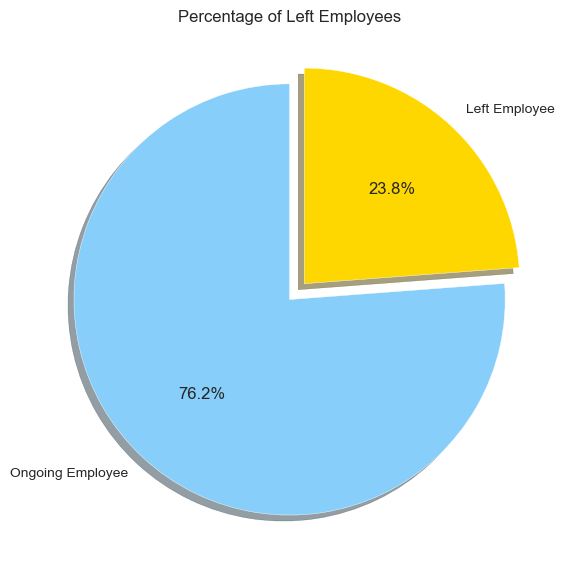

In [198]:
# Percentage of Employees based on the "left" feature

fig = plt.figure(figsize =(10, 7))
plt.pie(df.left.value_counts(normalize=True), 
        labels = ["Ongoing Employee","Left Employee"], explode = (0, 0.1),autopct='%1.1f%%',shadow=True, startangle=90,
        colors=['LightSkyBlue', 'gold'])
plt.title("Percentage of Left Employees")
plt.show()

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

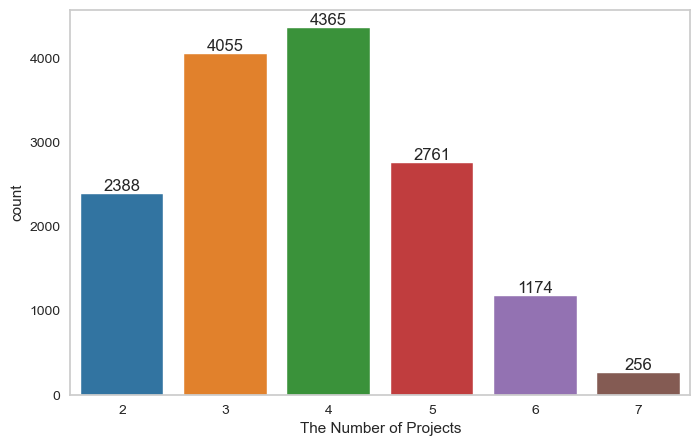

In [199]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="number_project", data=df, palette="tab10")
plt.xlabel("The Number of Projects")
ax.bar_label(ax.containers[0]);

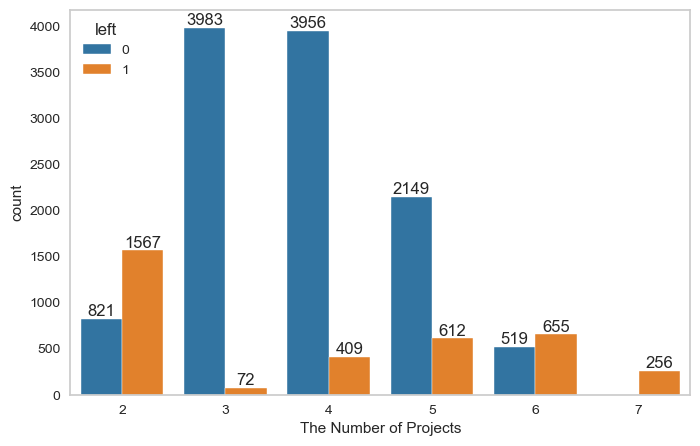

In [200]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="number_project", hue = "left", data=df, palette="tab10")
plt.xlabel("The Number of Projects")
for i in ax.containers:
    ax.bar_label(i);

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


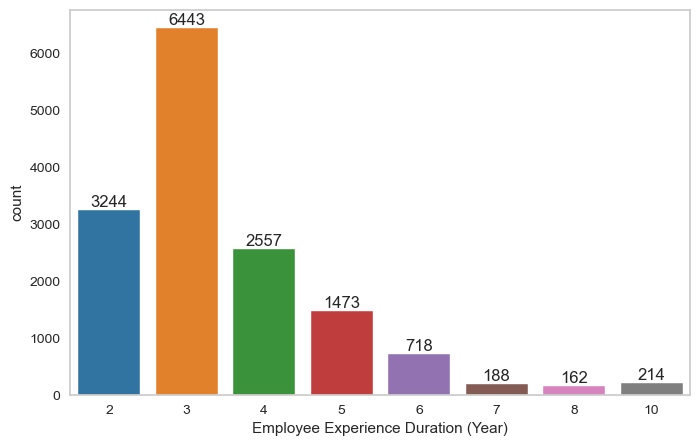

In [201]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="time_spend_company", data=df, palette="tab10")
plt.xlabel("Employee Experience Duration (Year)")
ax.bar_label(ax.containers[0]);

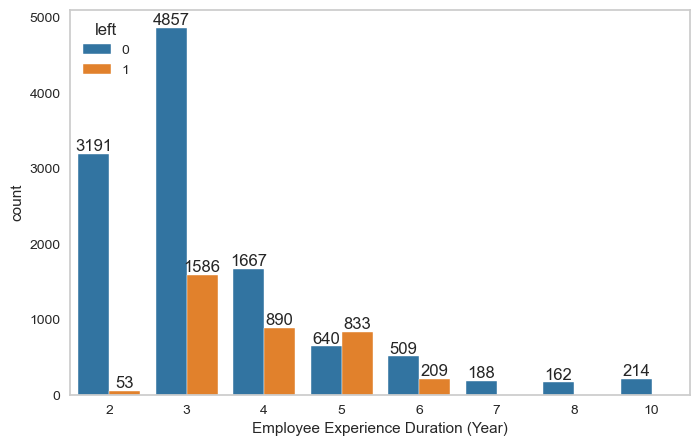

In [202]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="time_spend_company", hue="left", data=df, palette = "tab10")
plt.xlabel("Employee Experience Duration (Year)")
for i in ax.containers:
    ax.bar_label(i)

### Work Accident

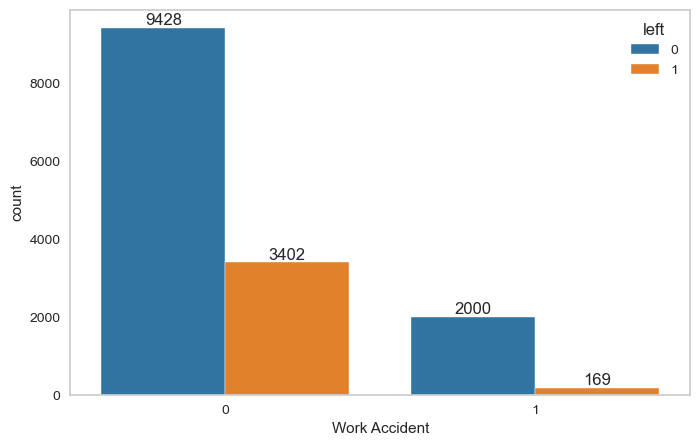

In [203]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="work_accident", hue="left", data=df, palette = "tab10")
plt.xlabel("Work Accident")
for i in ax.containers:
    ax.bar_label(i)

### Promotion Last 5 years

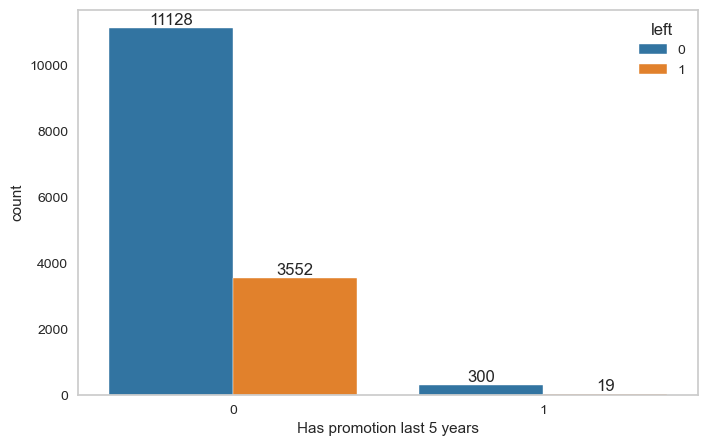

In [204]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="promotion_last_5years", hue="left", data=df, palette = "tab10")
plt.xlabel("Has promotion last 5 years")
for i in ax.containers:
    ax.bar_label(i)

### Departments

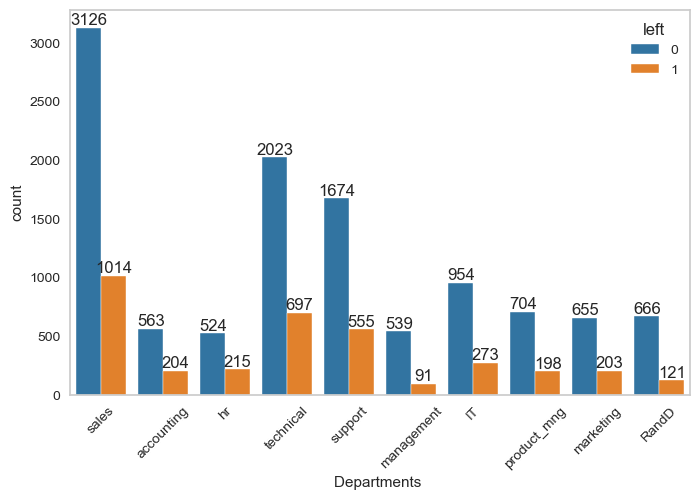

In [205]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="departments", hue="left", data=df, palette = "tab10")
plt.xlabel("Departments ")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)

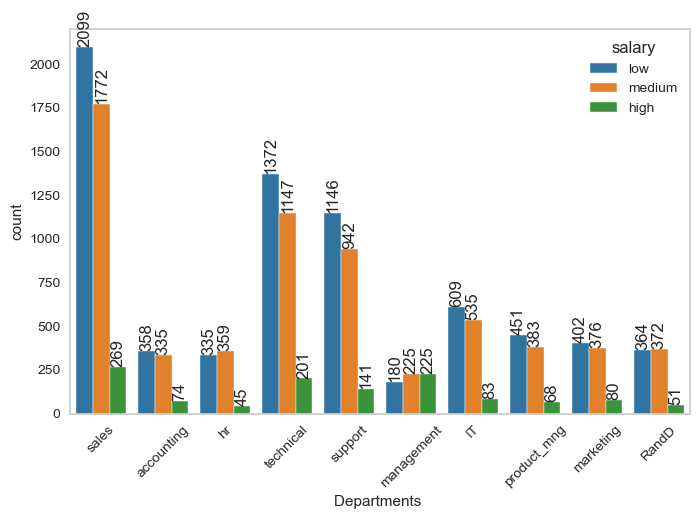

In [206]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="departments", hue="salary", data=df, palette = "tab10")
plt.xlabel("Departments ")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i, rotation=90)

### Salary

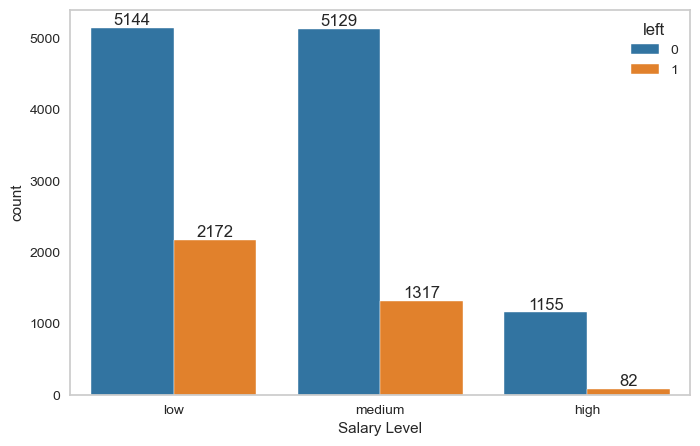

In [207]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="salary", hue="left", data=df, palette = "tab10")
plt.xlabel("Salary Level")
for i in ax.containers:
    ax.bar_label(i)

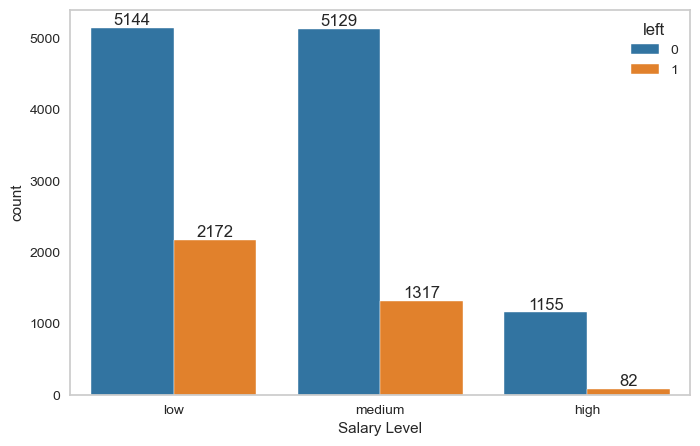

In [208]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="salary", hue="left", data=df, palette = "tab10")
plt.xlabel("Salary Level")
for i in ax.containers:
    ax.bar_label(i)

### Subplots of Features

You can use the methods of the matplotlib.

#### Distribution of numerical features

In [209]:
numeric = df.select_dtypes(exclude="O").columns
numeric

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'left'],
      dtype='object')

In [210]:
df[numeric].head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years  left  
0                   3              0                      0     1  
1                   6              0                      0     1  
2                   4              0                      0     1  
3                   5              0                      0     1  
4                   3              0                      0     1

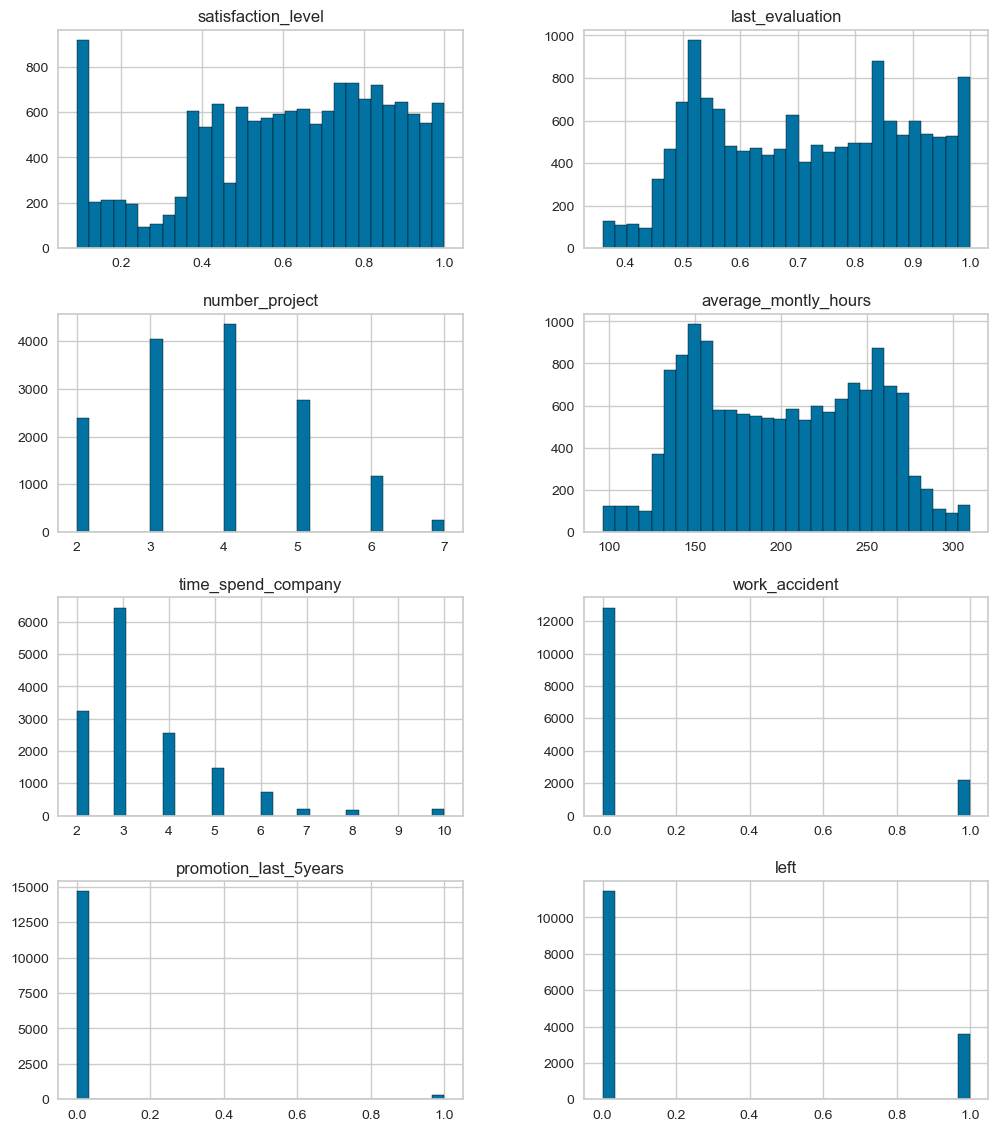

In [211]:
fig_ = df[numeric].hist(figsize=(12, 36), layout=(10,2), bins=30, edgecolor="black");

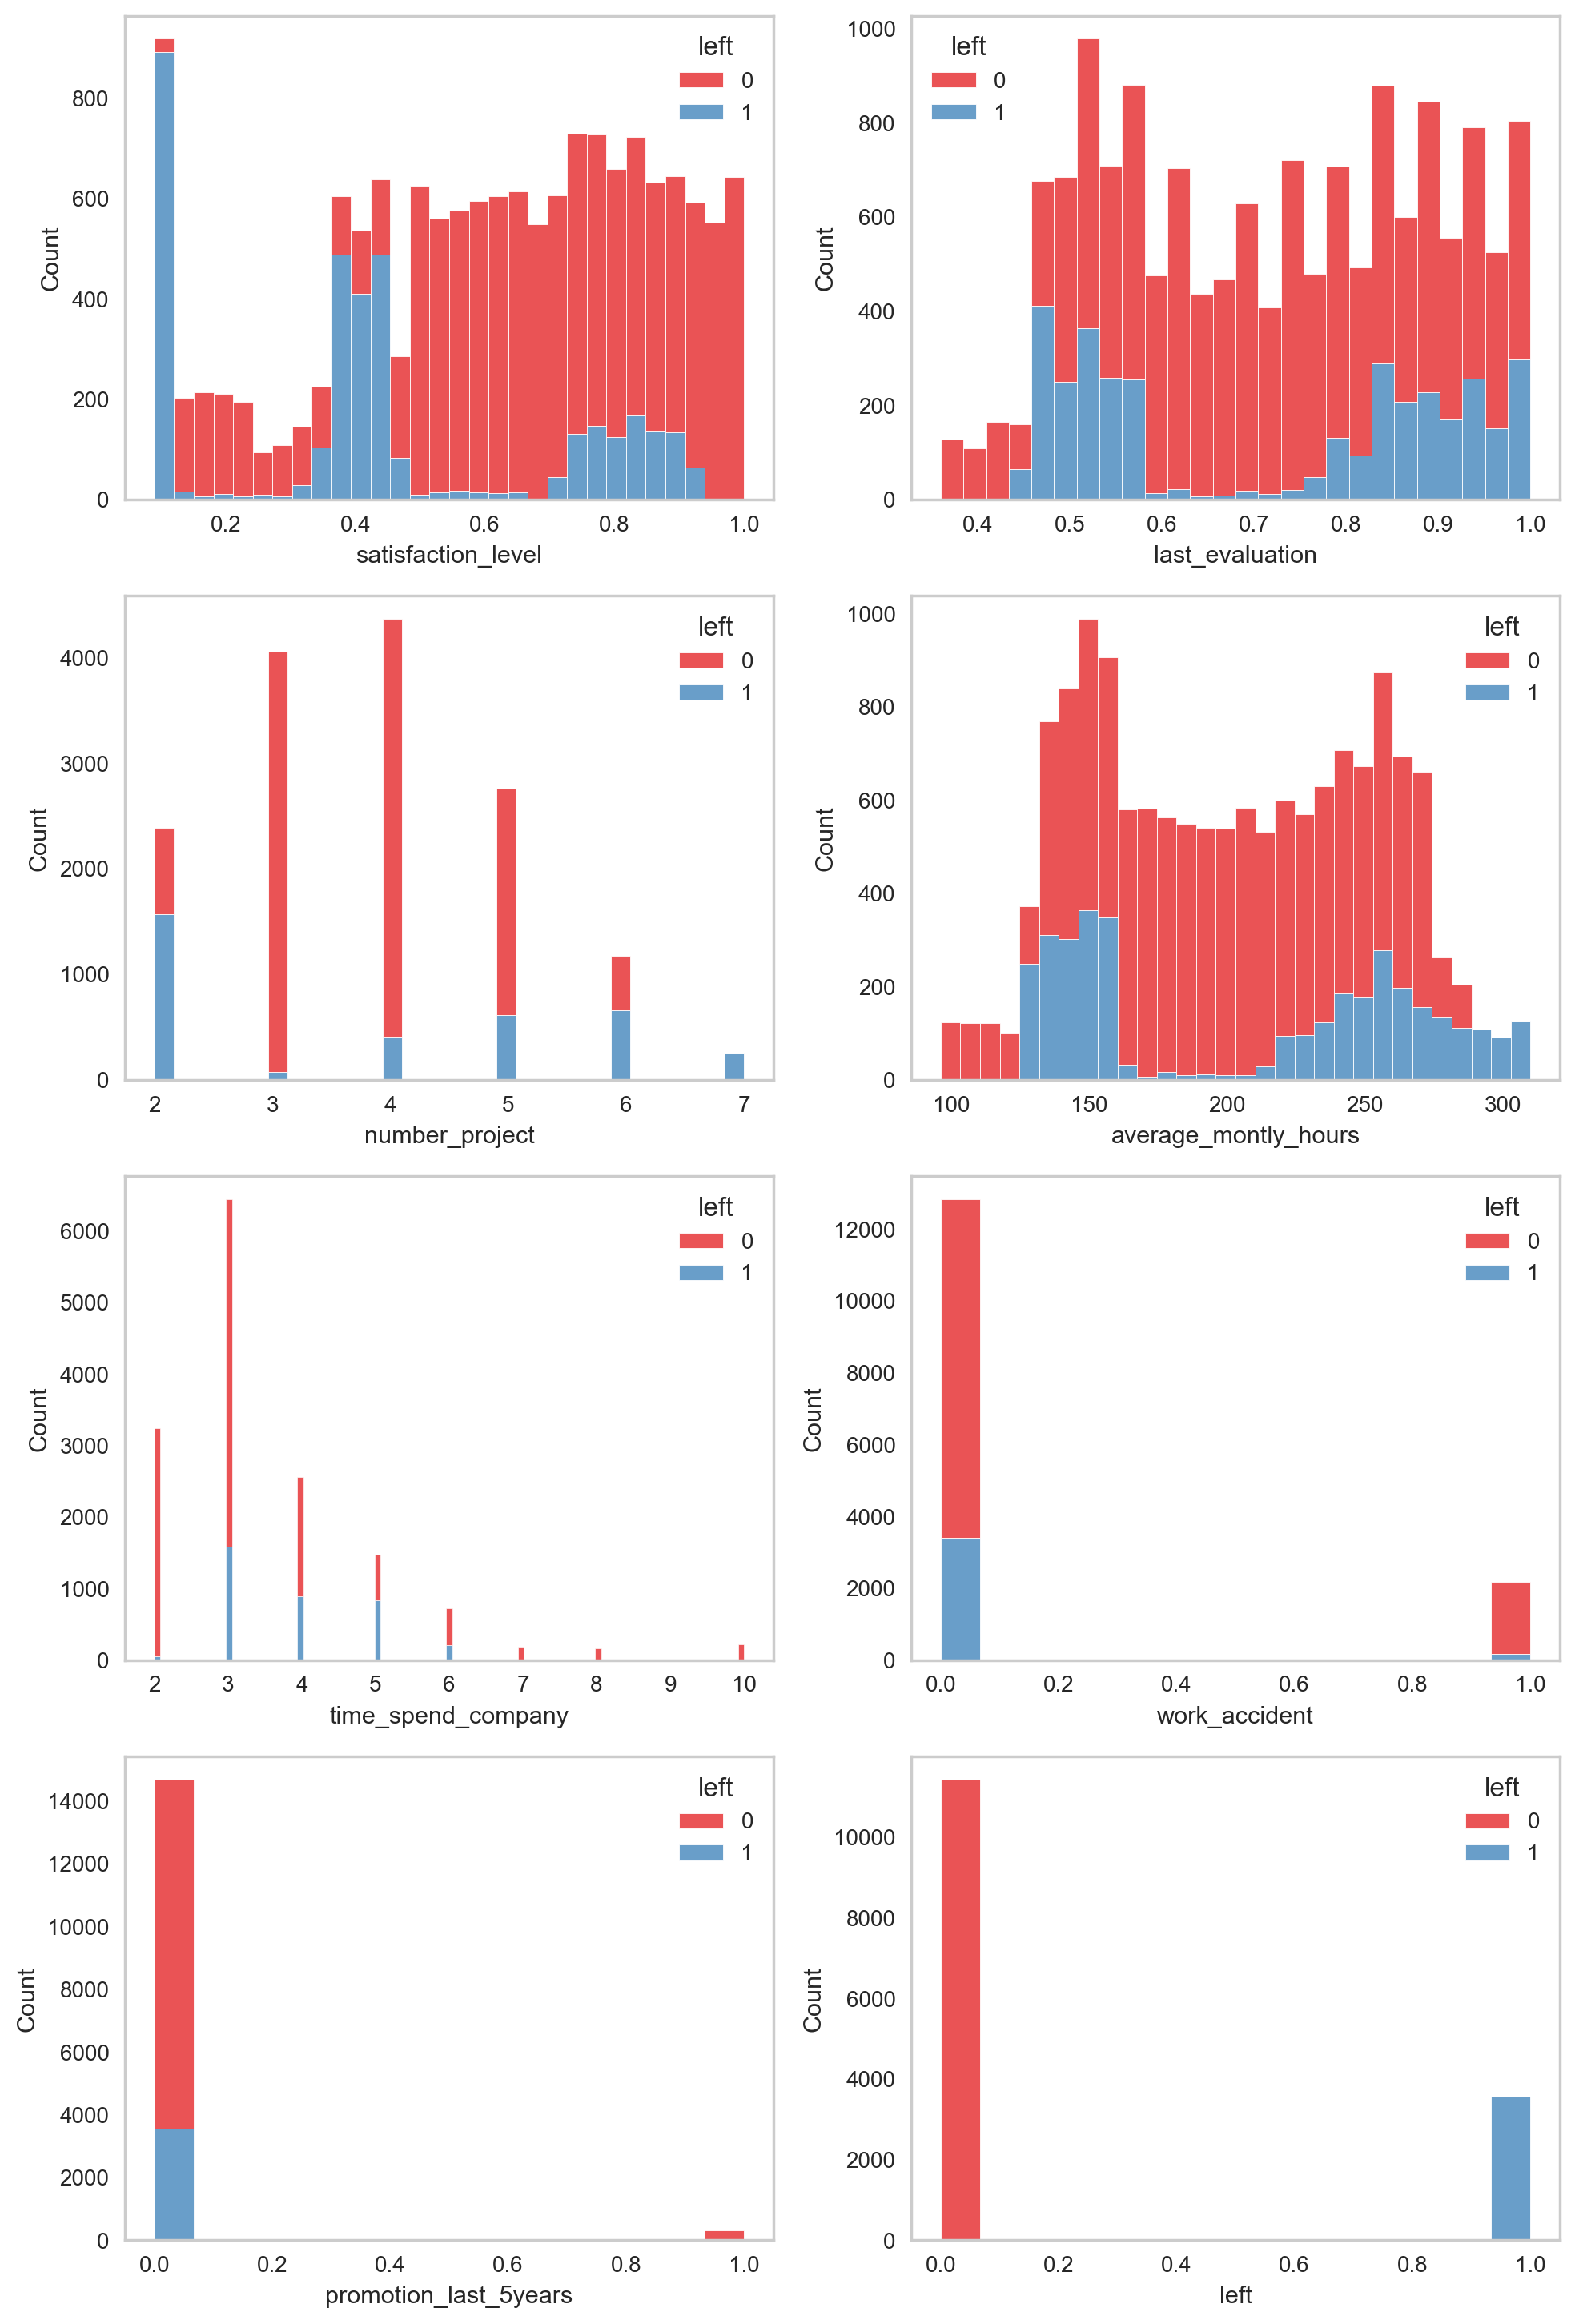

In [212]:
fig = plt.figure(figsize=(10,36), dpi=200)
for i, col in enumerate(df[numeric]):
        plt.subplot(10,2,i+1)
        sns.histplot(x= col, hue="left", data=df, multiple="stack", palette="Set1"
                    )
plt.tight_layout();

#### Boxplots for numerical features based on the "left" feature

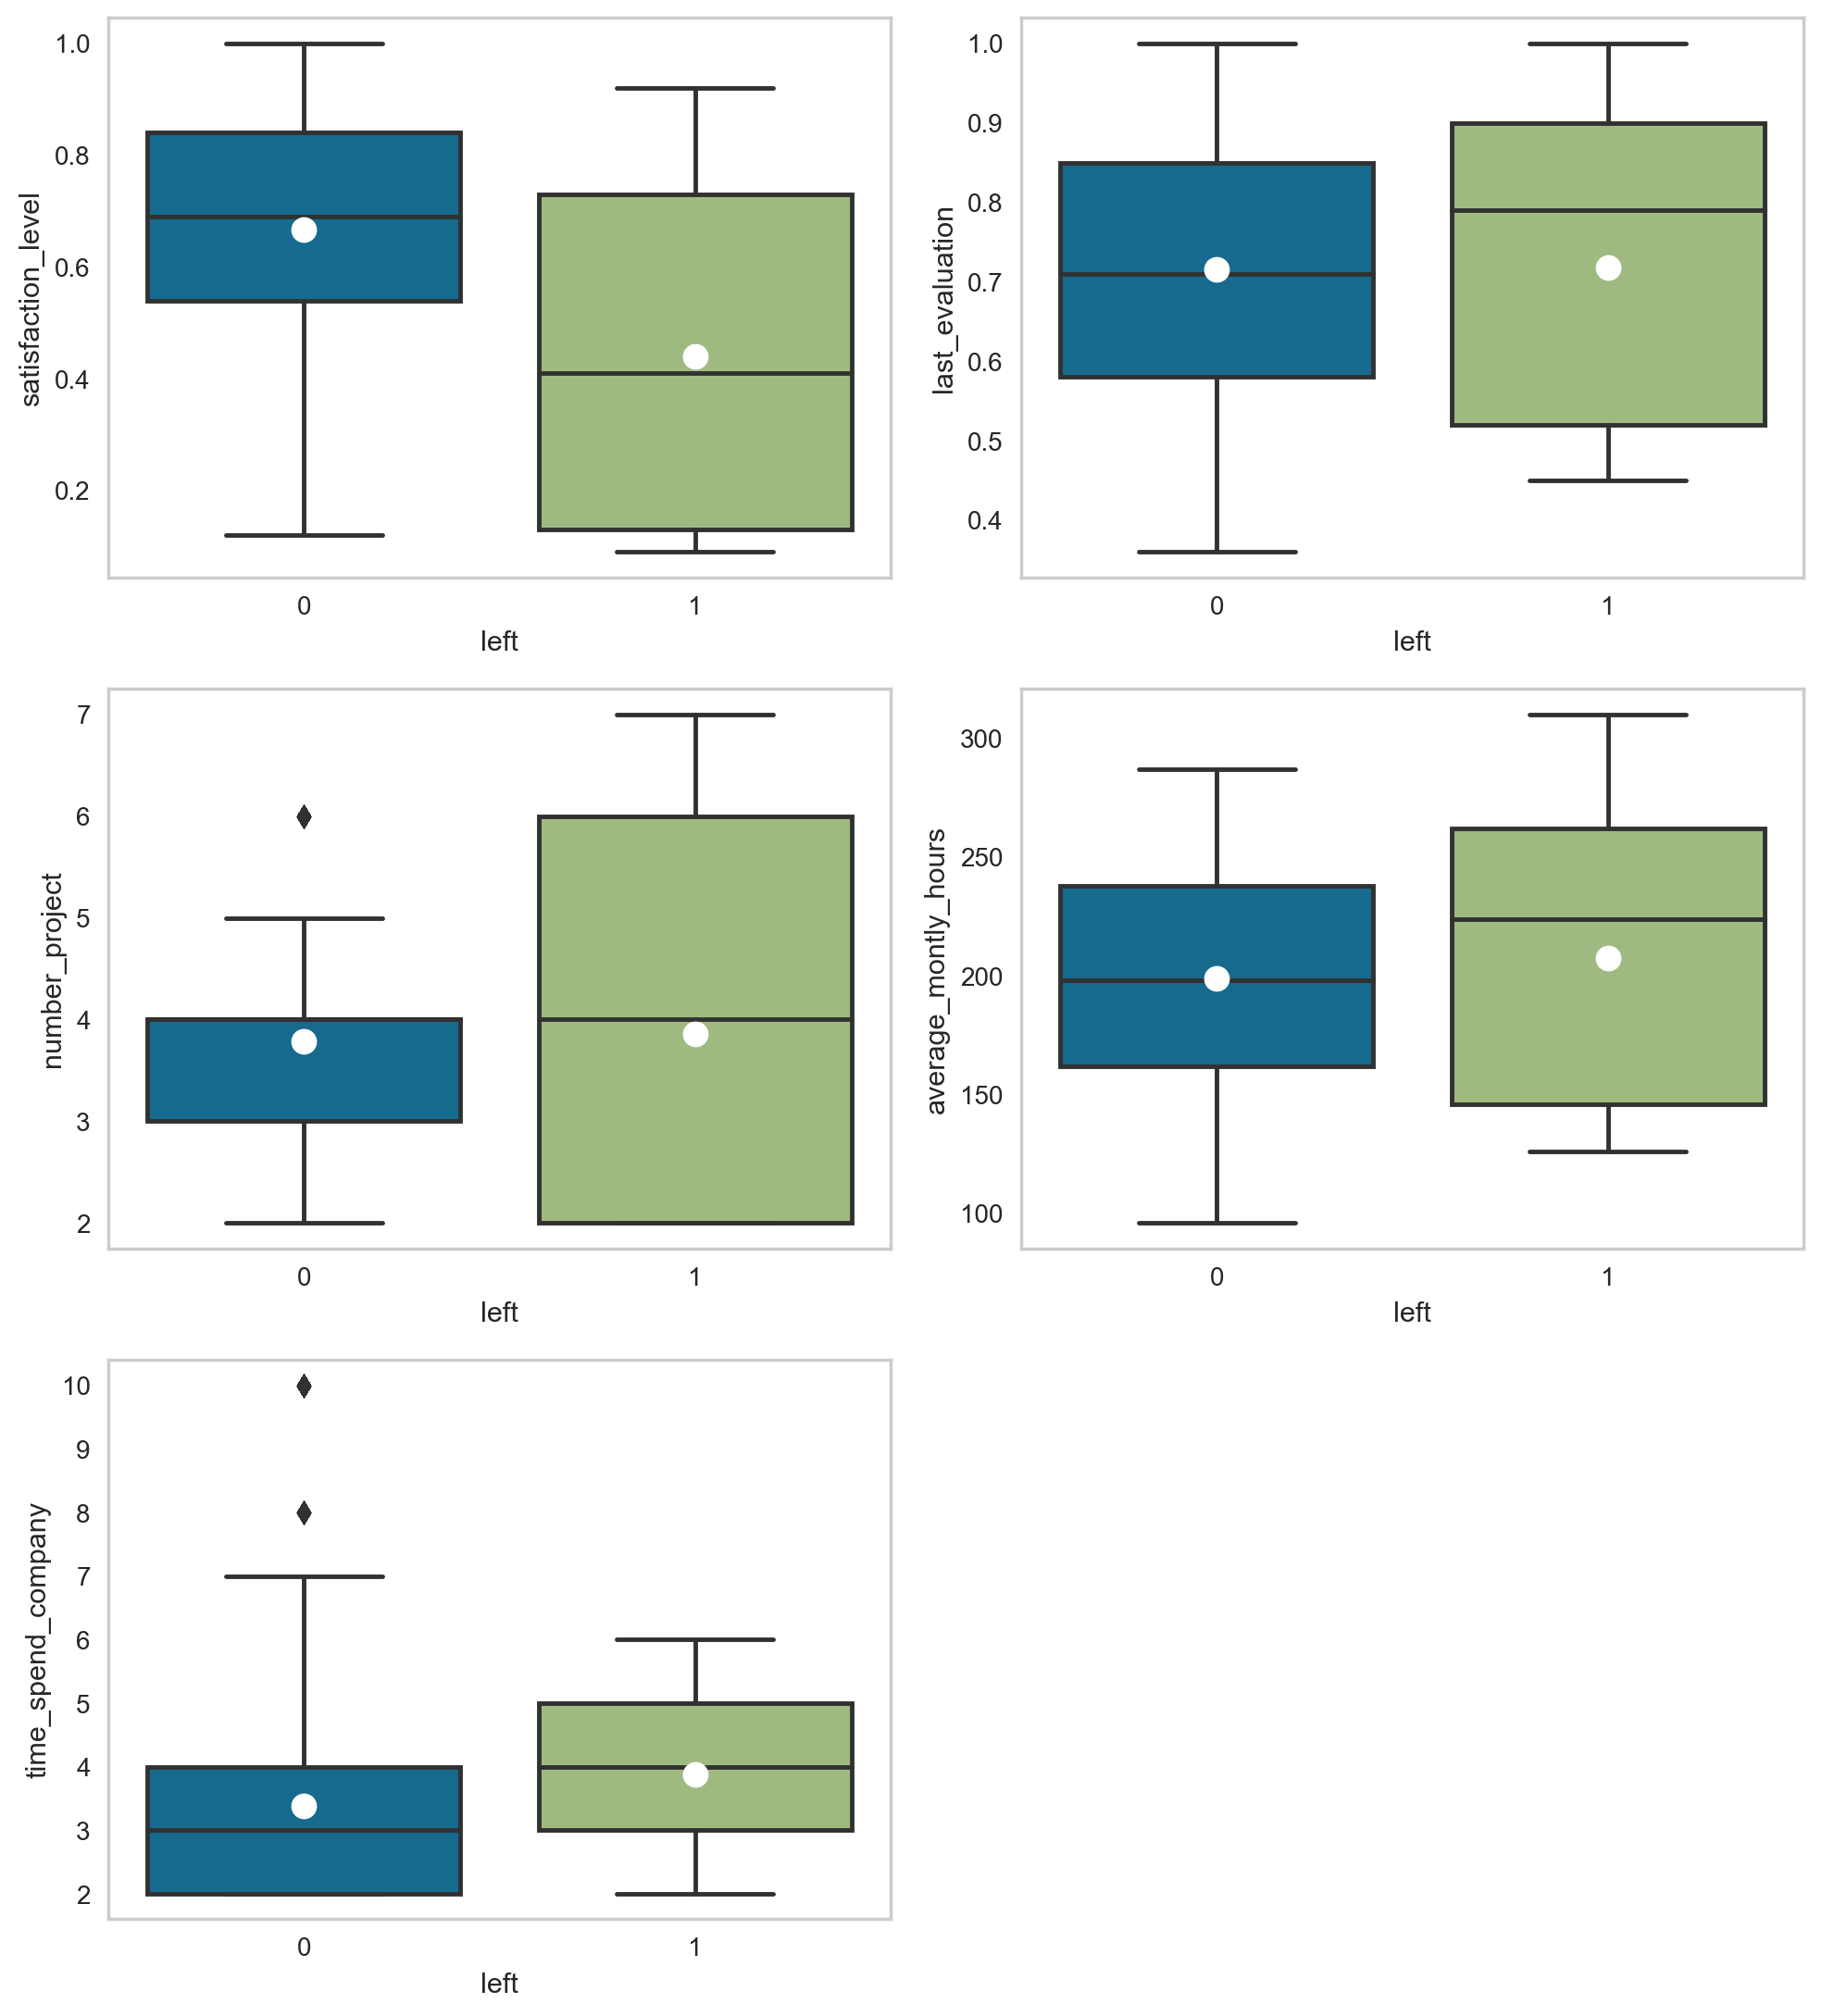

In [213]:
fig = plt.figure(figsize=(10,36), dpi=200)
for i, col in enumerate(df[numeric].iloc[:,:-3]):
        plt.subplot(10,2,i+1)
        sns.boxplot(x= "left", y=col, data=df,
                    showmeans=True,
                    meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.tight_layout();

#### Pairplots for numerical features based on the "left" feature

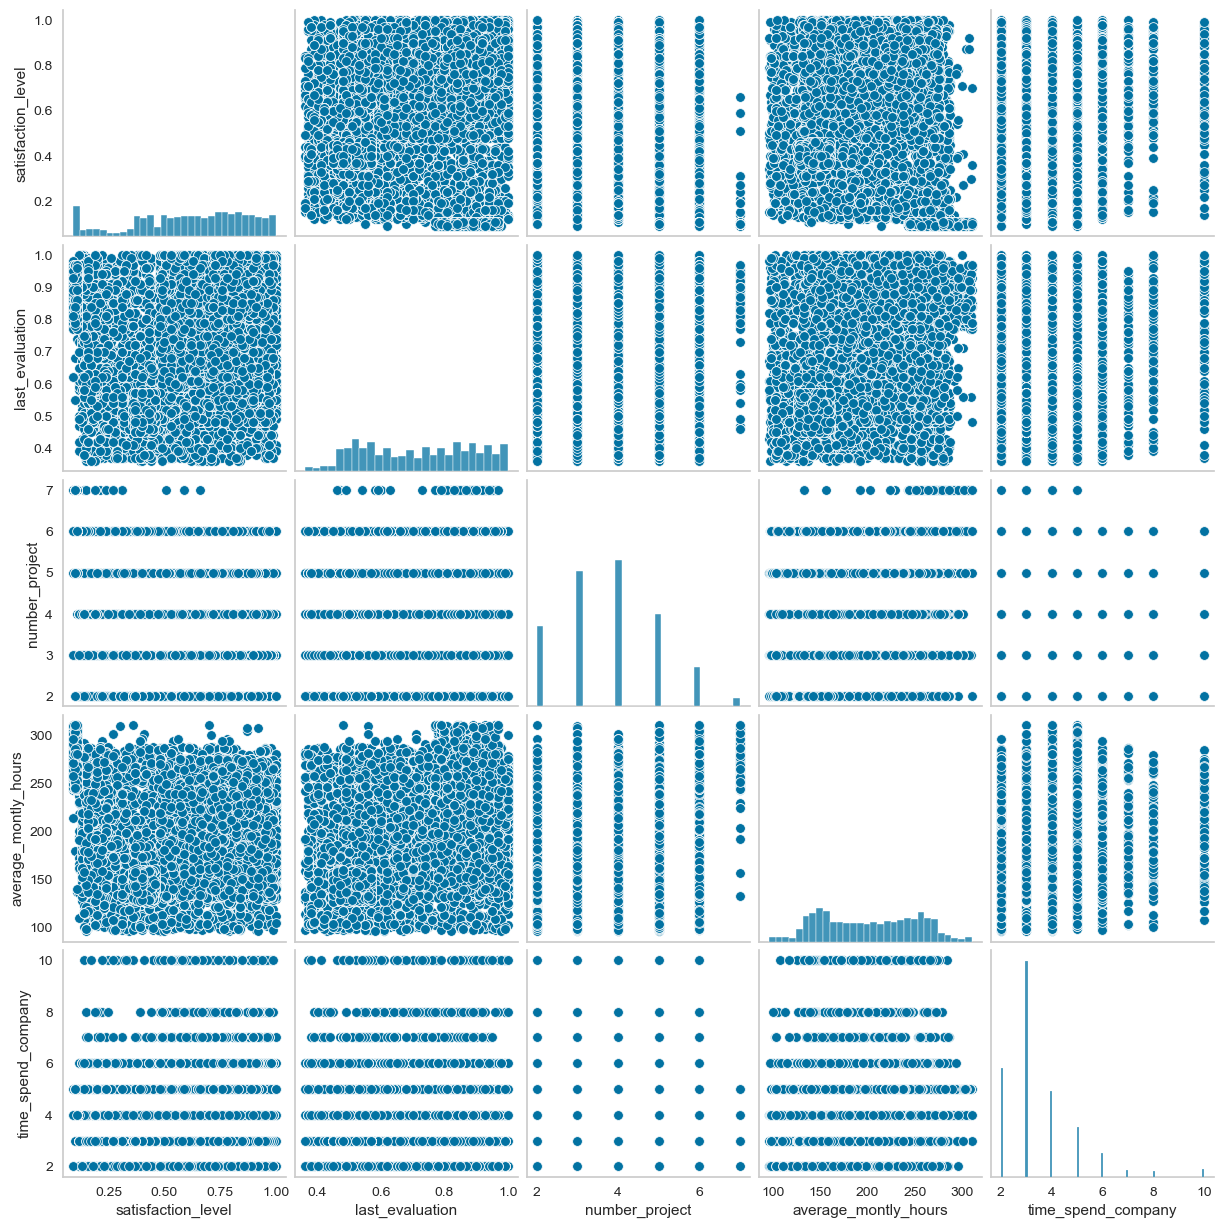

In [214]:
sns.pairplot(df[numeric].iloc[:,:-3]);

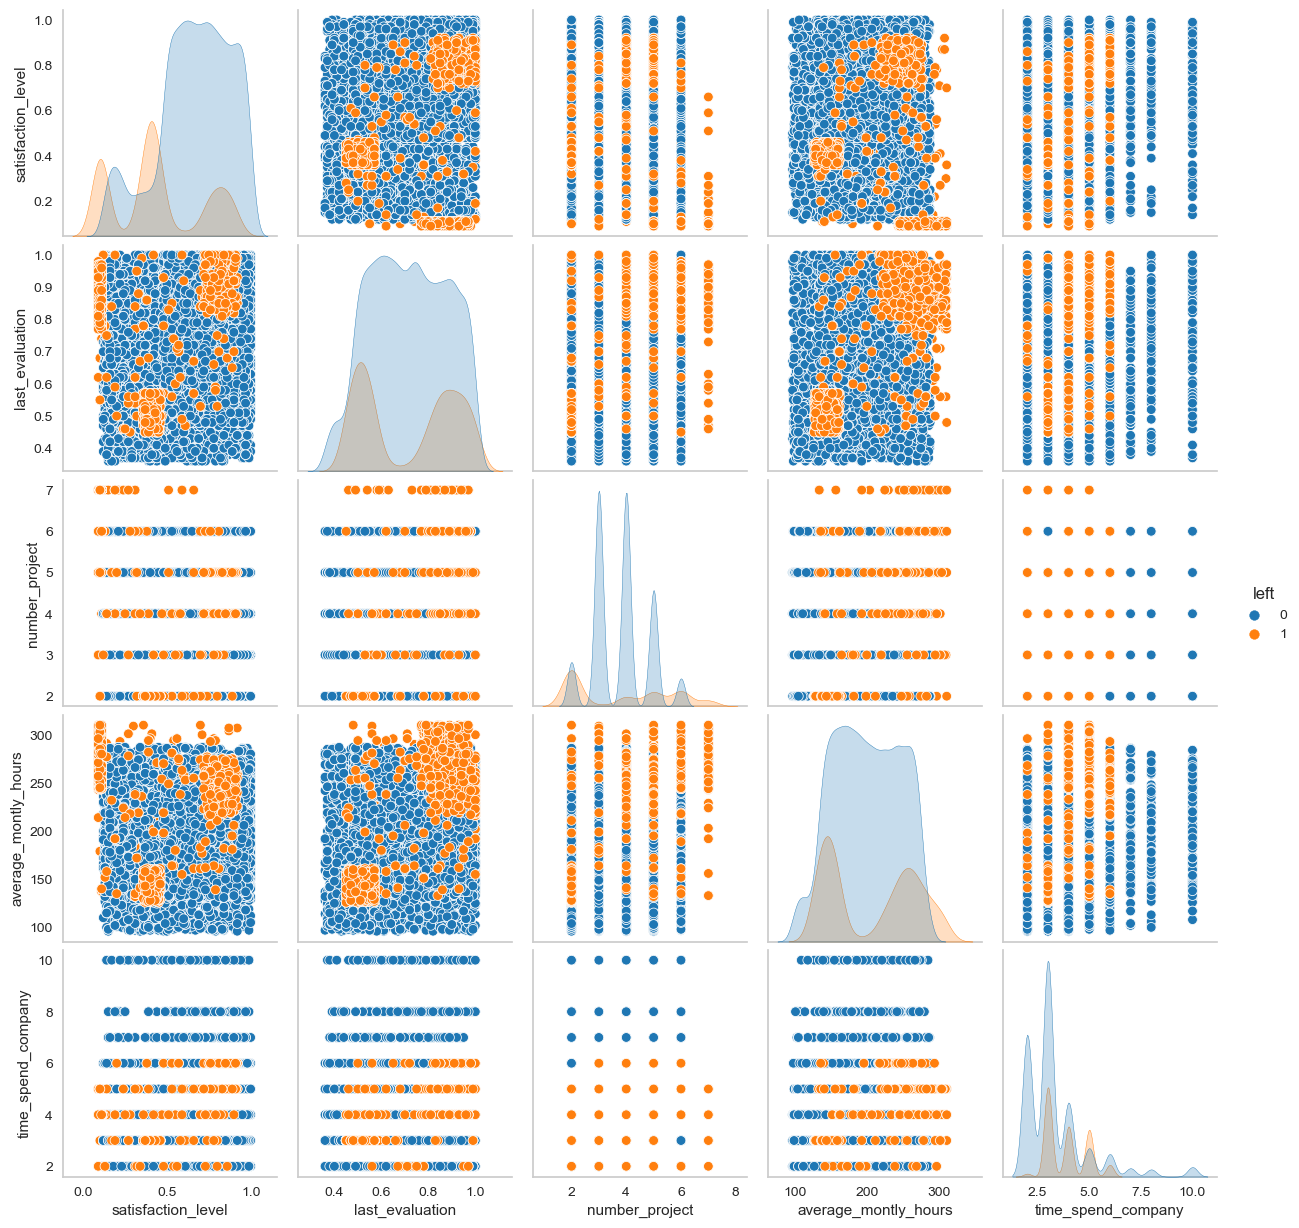

In [215]:
sns.pairplot(df[numeric].iloc[:, [0,1,2,3,4,7]], hue="left", palette="tab10" );

#### Heatmap for numerical features based on the "left" feature

In [216]:
df.corr().style.background_gradient(cmap='YlGnBu')

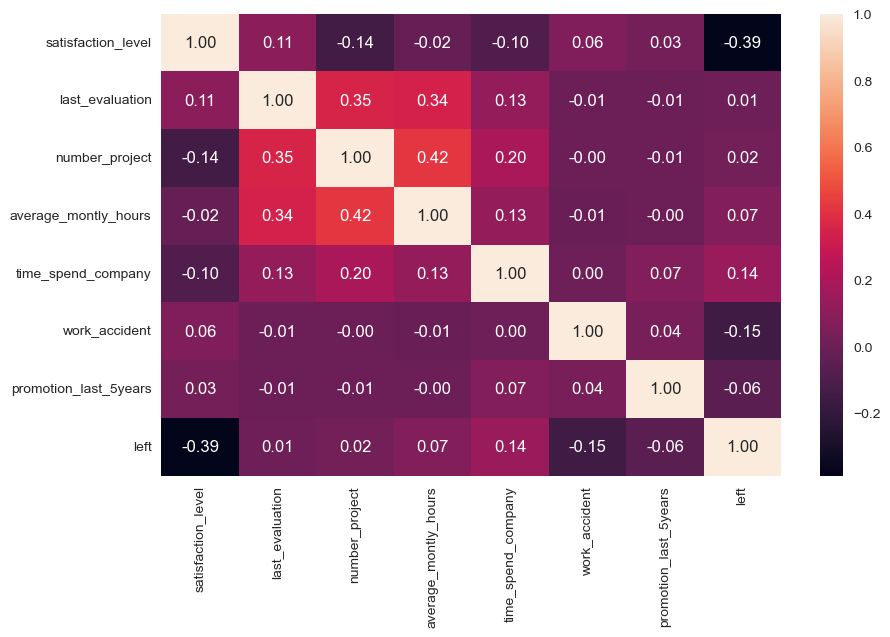

In [217]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

##  Data Pre-Processing

### Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [218]:
# df.drop_duplicates(inplace=True)

In [219]:
df_new = df.copy()

In [220]:
random_state=101

In [221]:
cat = df.select_dtypes("O").columns

In [222]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

enc = OrdinalEncoder()
enc.fit_transform(df[cat])

array([[7., 1.],
       [7., 2.],
       [7., 2.],
       ...,
       [8., 1.],
       [8., 1.],
       [8., 1.]])

In [223]:
df_new[cat] = enc.fit_transform(df[cat])
df_new

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
14994                   151                   3              0   
14995                   160                   3              0   
14996                   143                   3              0   
14997                   280                   4              0   
14998                   158                   3              0   

       promotion_last_5years  departments  salary  left  
0                          0         7.00    1.00     1  
1                          0         7.00    2.00     1  
2                          0         7.00    2.00     1  
3                          0         7.00    1.00     1  
4                          0         7.00    1.00     1  
...                      ...          ...     ...   ...  
14994                      0         8.00    1.00     1  
14995                      0         8.00    1.00     1  
14996                      0         8.00    1.00     1  
14997                      0         8.00    1.00     1  
14998                      0         8.00    1.00     1  

[14999 rows x 10 columns]

In [224]:
df_new.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years  departments  \
0                   3              0                      0         7.00   
1                   6              0                      0         7.00   
2                   4              0                      0         7.00   
3                   5              0                      0         7.00   
4                   3              0                      0         7.00   

   salary  left  
0    1.00     1  
1    2.00     1  
2    2.00     1  
3    1.00     1  
4    1.00     1

### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [225]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [226]:
X = df_new.drop(columns= "left")
y = df_new["left"]

In [227]:
copied_X = X.copy()

In [228]:
scaler = MinMaxScaler()

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import make_column_transformer, ColumnTransformer

column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ["salary","Departments "]), 
    remainder= scaler
)
X = pd.DataFrame(data=column_trans.fit_transform(X), columns=column_trans.get_feature_names_out())
X.describe().T

In [229]:
# converting to frame is not necessery, I just wanted to see
X = pd.DataFrame(scaler.fit_transform(X), index= X.index, columns= X.columns)

In [230]:
X["left"] = y

In [231]:
X

satisfaction_level  last_evaluation  number_project  \
0                    0.32             0.27            0.00   
1                    0.78             0.78            0.60   
2                    0.02             0.81            1.00   
3                    0.69             0.80            0.60   
4                    0.31             0.25            0.00   
...                   ...              ...             ...   
14994                0.34             0.33            0.00   
14995                0.31             0.19            0.00   
14996                0.31             0.27            0.00   
14997                0.02             0.94            0.80   
14998                0.31             0.25            0.00   

       average_montly_hours  time_spend_company  work_accident  \
0                      0.29                0.12           0.00   
1                      0.78                0.50           0.00   
2                      0.82                0.25           0.00   
3                      0.59                0.38           0.00   
4                      0.29                0.12           0.00   
...                     ...                 ...            ...   
14994                  0.26                0.12           0.00   
14995                  0.30                0.12           0.00   
14996                  0.22                0.12           0.00   
14997                  0.86                0.25           0.00   
14998                  0.29                0.12           0.00   

       promotion_last_5years  departments  salary  left  
0                       0.00         0.78    0.50     1  
1                       0.00         0.78    1.00     1  
2                       0.00         0.78    1.00     1  
3                       0.00         0.78    0.50     1  
4                       0.00         0.78    0.50     1  
...                      ...          ...     ...   ...  
14994                   0.00         0.89    0.50     1  
14995                   0.00         0.89    0.50     1  
14996                   0.00         0.89    0.50     1  
14997                   0.00         0.89    0.50     1  
14998                   0.00         0.89    0.50     1  

[14999 rows x 10 columns]

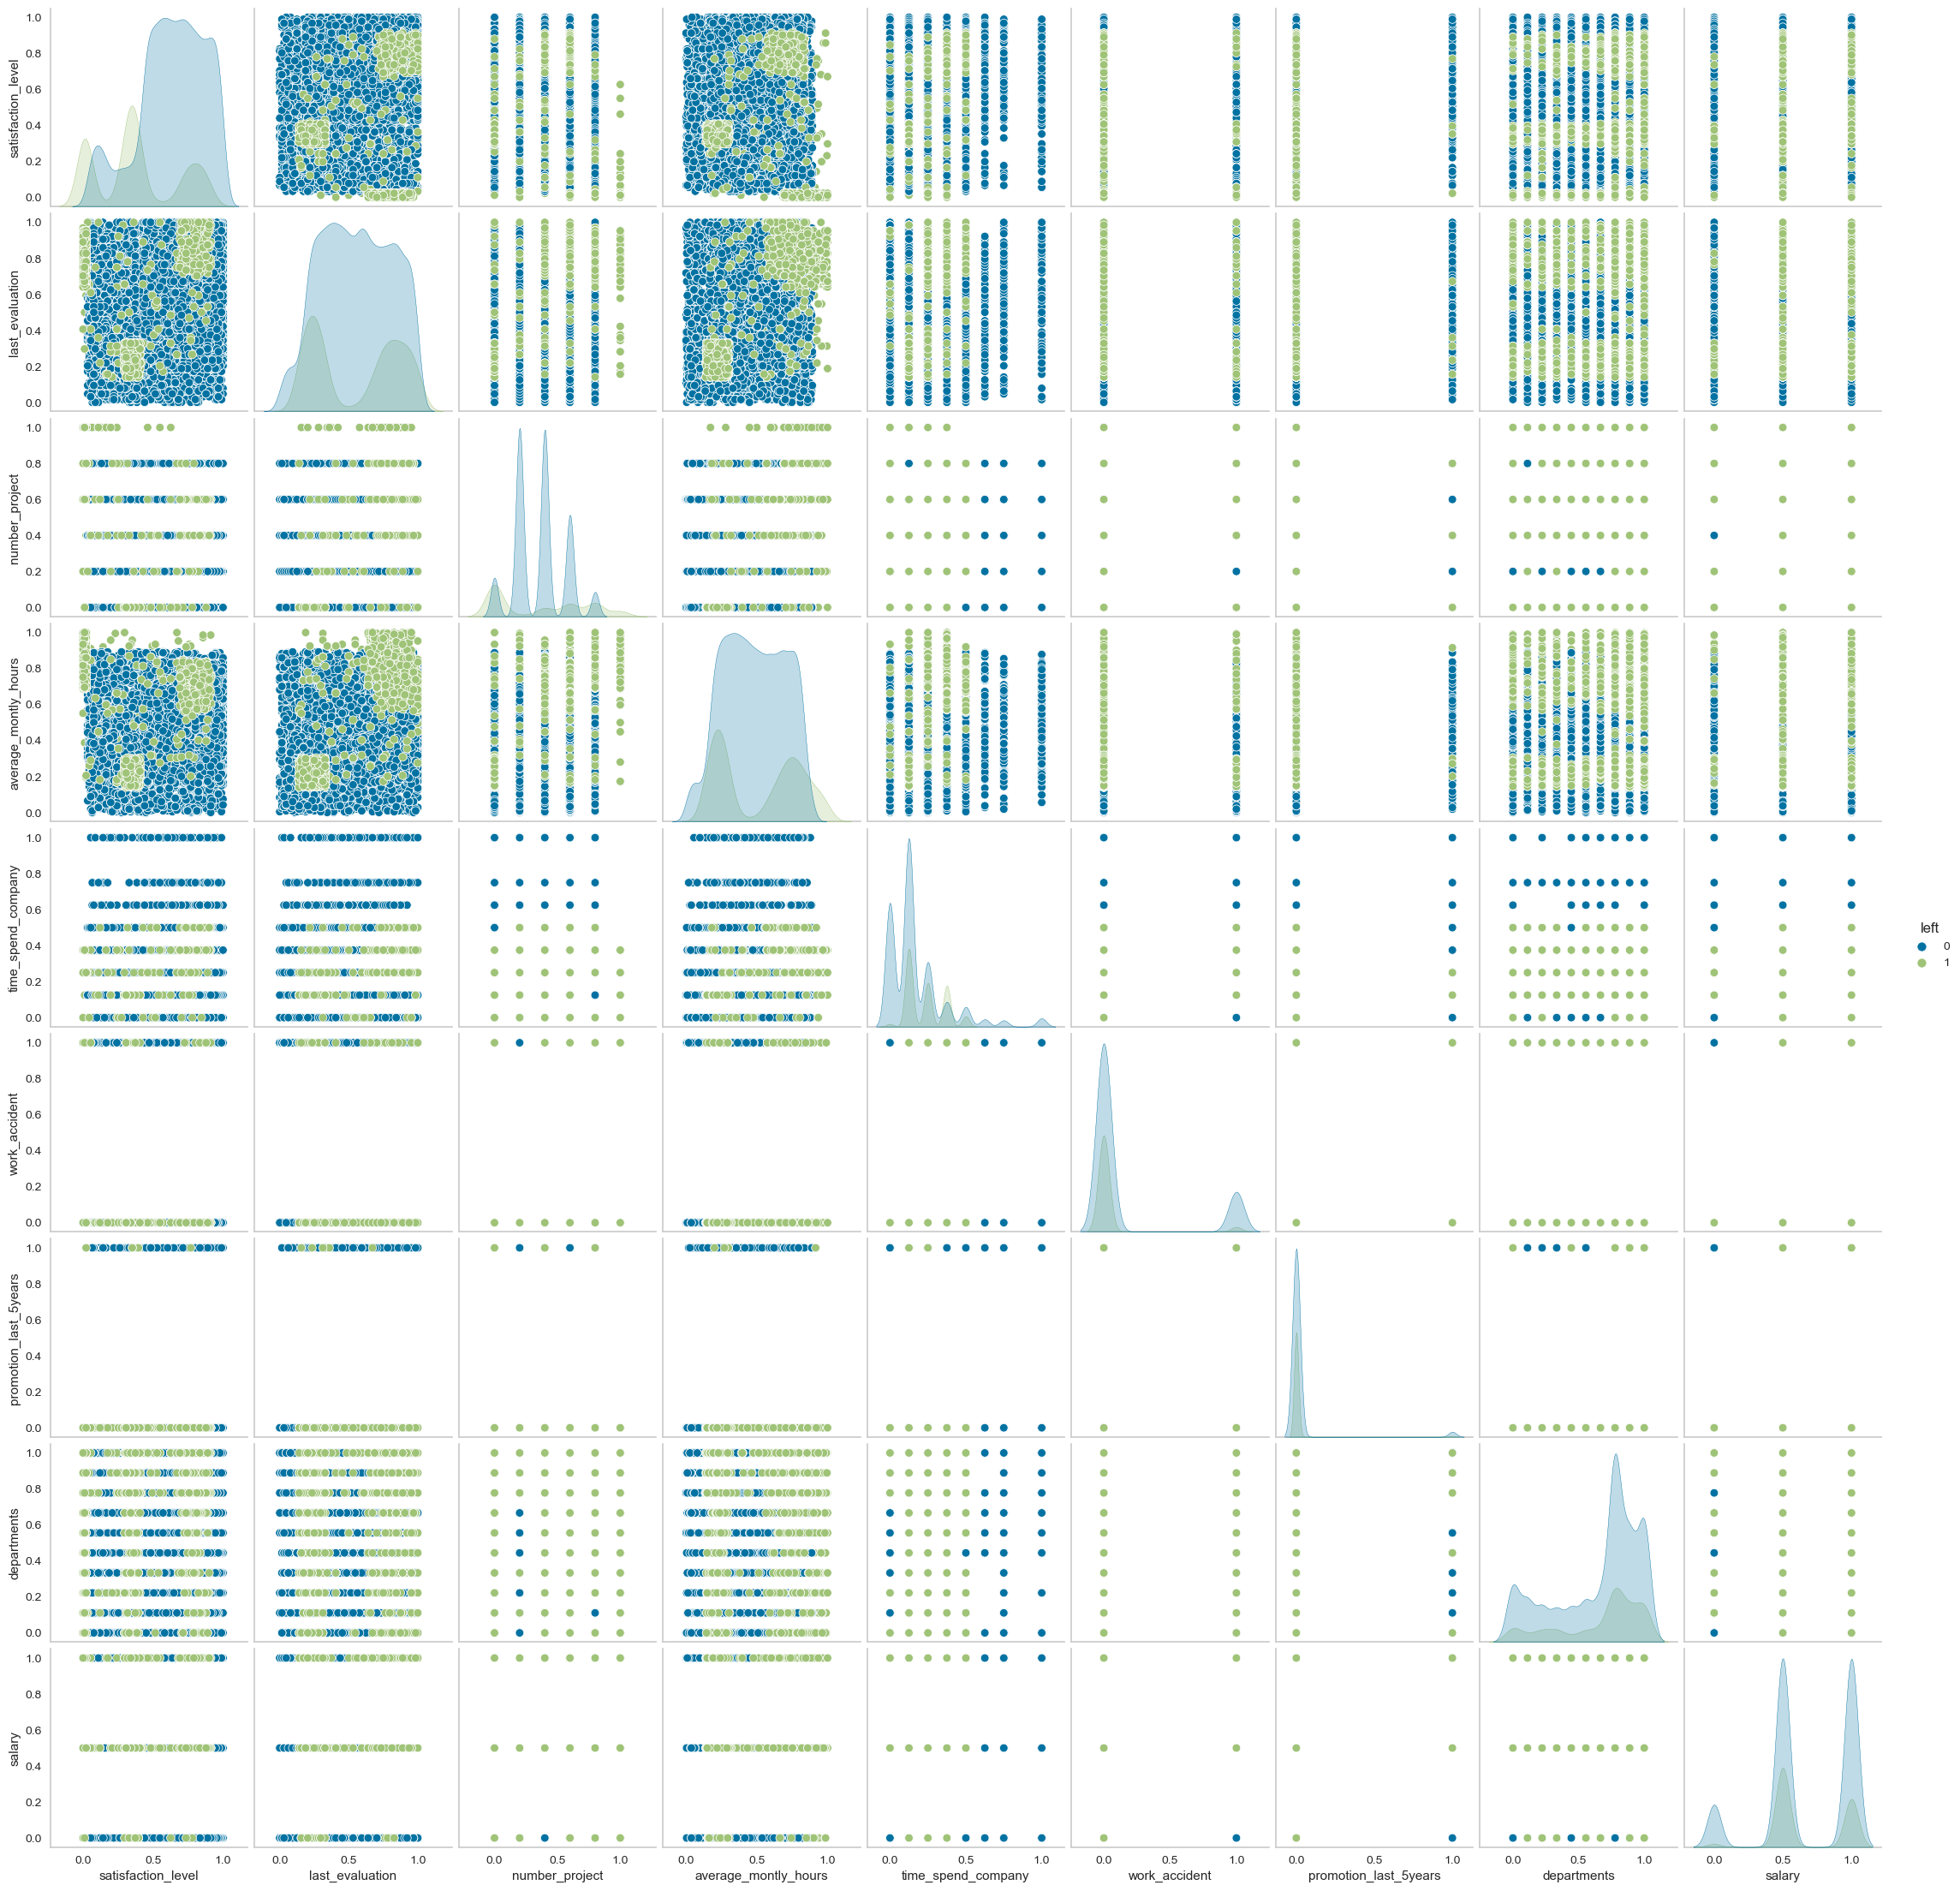

In [232]:
sns.pairplot(X,hue= "left")

## Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

In [233]:
from pyclustertend import hopkins

In [234]:
X = X.drop(columns="left")

In [235]:
X.shape

(14999, 9)

In [236]:
hopkins(X, X.shape[0])

0.1275397461176187

In [237]:
from sklearn.cluster import KMeans

model1 = KMeans(n_clusters=2, random_state=42)

In [238]:
# model.fit_predict(X)

In [239]:
model1.fit(X)

KMeans(n_clusters=2, random_state=42)

In [240]:
model1.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [241]:
X["labels"] = model1.labels_

In [242]:
X

satisfaction_level  last_evaluation  number_project  \
0                    0.32             0.27            0.00   
1                    0.78             0.78            0.60   
2                    0.02             0.81            1.00   
3                    0.69             0.80            0.60   
4                    0.31             0.25            0.00   
...                   ...              ...             ...   
14994                0.34             0.33            0.00   
14995                0.31             0.19            0.00   
14996                0.31             0.27            0.00   
14997                0.02             0.94            0.80   
14998                0.31             0.25            0.00   

       average_montly_hours  time_spend_company  work_accident  \
0                      0.29                0.12           0.00   
1                      0.78                0.50           0.00   
2                      0.82                0.25           0.00   
3                      0.59                0.38           0.00   
4                      0.29                0.12           0.00   
...                     ...                 ...            ...   
14994                  0.26                0.12           0.00   
14995                  0.30                0.12           0.00   
14996                  0.22                0.12           0.00   
14997                  0.86                0.25           0.00   
14998                  0.29                0.12           0.00   

       promotion_last_5years  departments  salary  labels  
0                       0.00         0.78    0.50       0  
1                       0.00         0.78    1.00       0  
2                       0.00         0.78    1.00       0  
3                       0.00         0.78    0.50       0  
4                       0.00         0.78    0.50       0  
...                      ...          ...     ...     ...  
14994                   0.00         0.89    0.50       0  
14995                   0.00         0.89    0.50       0  
14996                   0.00         0.89    0.50       0  
14997                   0.00         0.89    0.50       0  
14998                   0.00         0.89    0.50       0  

[14999 rows x 10 columns]

In [243]:
X["left"] = y

In [244]:
ct = pd.crosstab(X.left, X.labels)
ct

labels     0     1
left              
0       9428  2000
1       3402   169

<AxesSubplot:xlabel='labels', ylabel='count'>

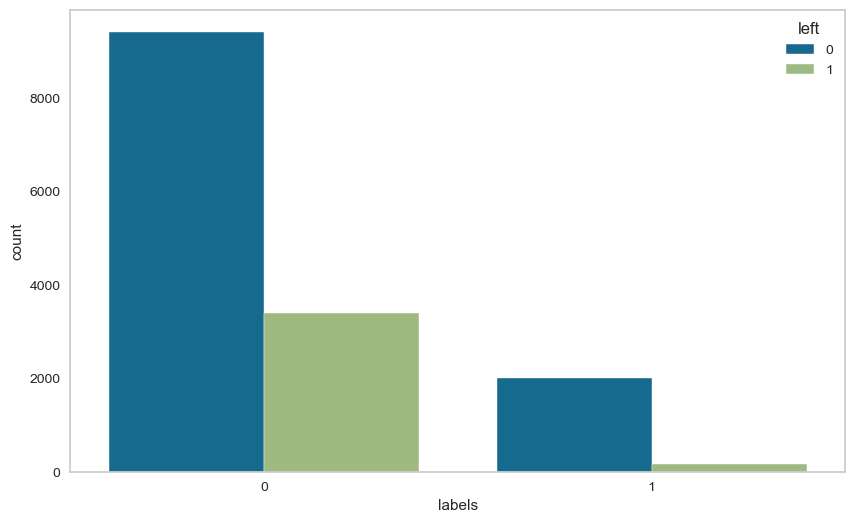

In [245]:
sns.countplot(data= X, x="labels",hue= X["left"])

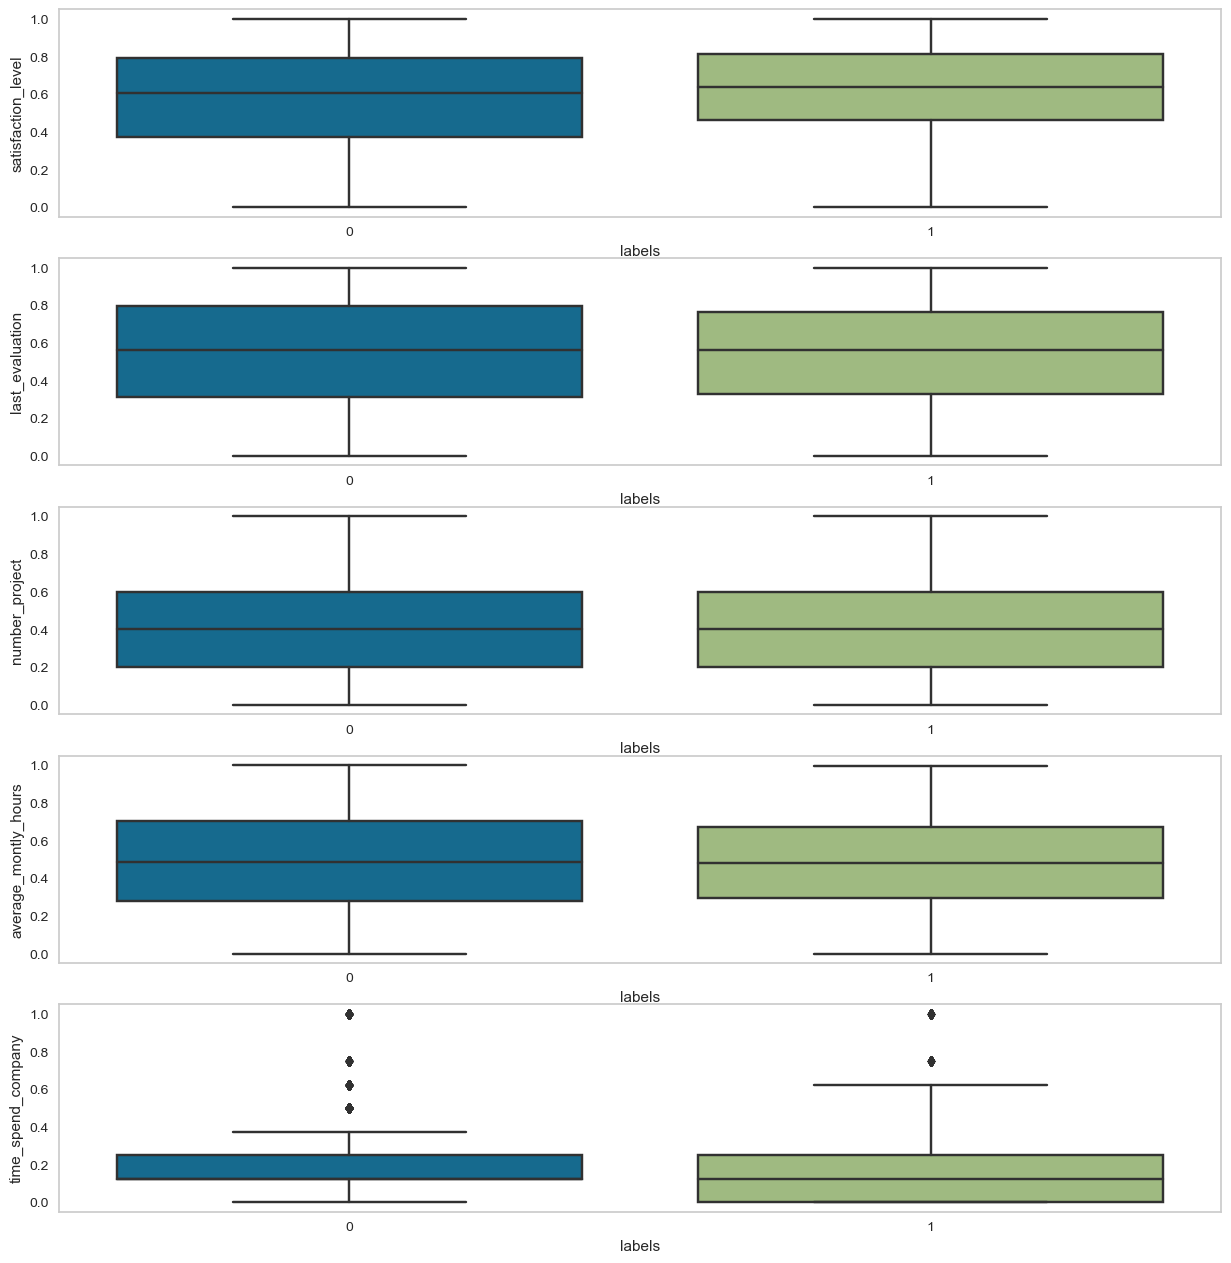

In [246]:
plt.figure(figsize=(15,35))

for i, j in enumerate(X.iloc[:,:5].columns):
    plt.subplot( len(X.columns),1, i+1)
    sns_plot = sns.boxplot(data = X,x =X.labels, y=X[j])
    fig = sns_plot.get_figure()

- As it's seen, 2 clusters are not enough to separate the employees. Probably, the reason is both the data is imbalance and the features are insufficient to group them.

### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [247]:
X = X.drop(columns=["left"])

In [248]:
ssd = [] #sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

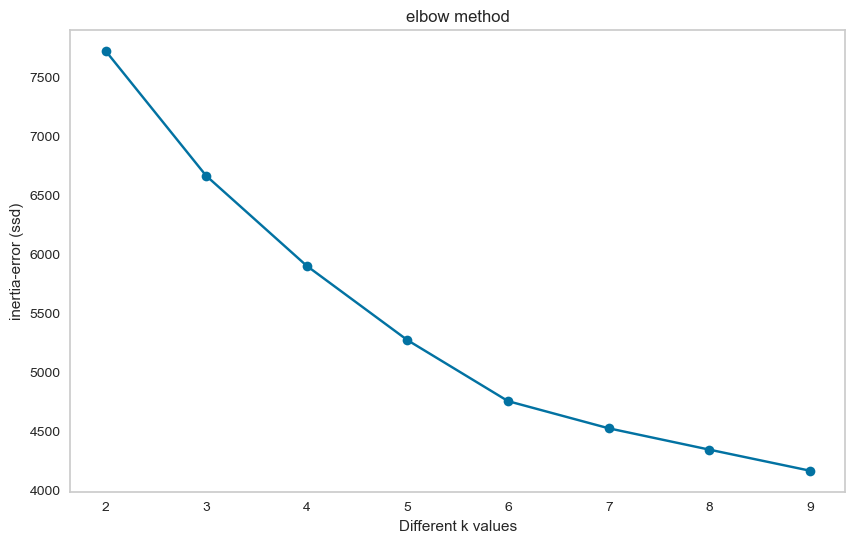

In [249]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method") 

In [250]:
ssd

[7720.391850402978,
 6660.767680628753,
 5896.901265252872,
 5267.645506625626,
 4750.561428654778,
 4520.528748622146,
 4339.640966145692,
 4161.07391508177]

In [251]:
pd.Series(ssd).diff()

0        NaN
1   -1059.62
2    -763.87
3    -629.26
4    -517.08
5    -230.03
6    -180.89
7    -178.57
dtype: float64

In [252]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1     NaN
2 1059.62
3  763.87
4  629.26
5  517.08
6  230.03
7  180.89
8  178.57

<AxesSubplot:>

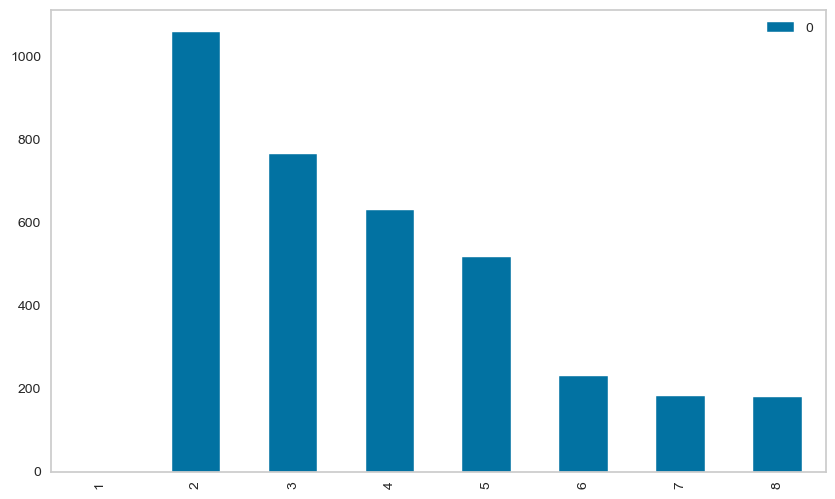

In [253]:
df_diff.plot(kind='bar')

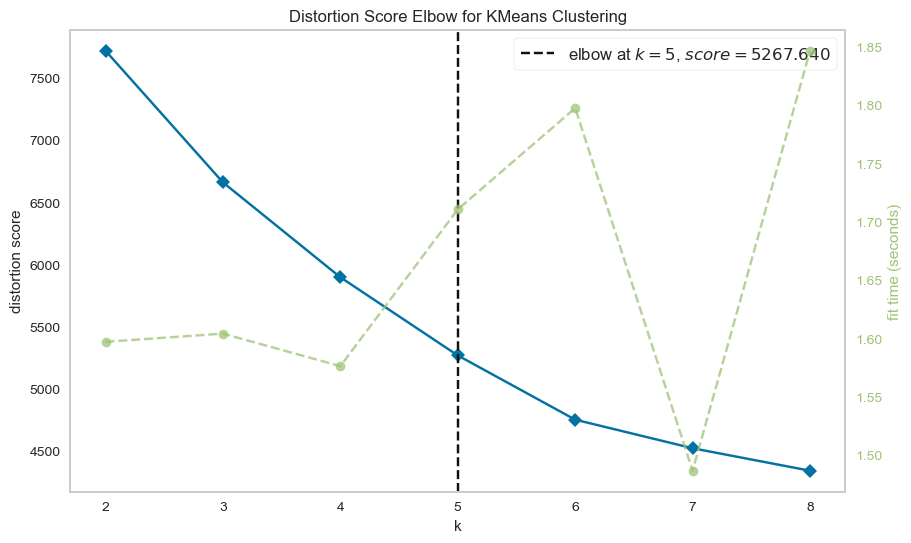

In [254]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(n_clusters=4,random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

### Silhouette Analysis

In [255]:
from sklearn.metrics import silhouette_score

In [256]:
silhouette_score(X,model.labels_)

0.19363217649370765

In [257]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4408203310356388
For n_clusters=3, the silhouette score is 0.23299224632137636
For n_clusters=4, the silhouette score is 0.20518976590373741
For n_clusters=5, the silhouette score is 0.22953322703398912
For n_clusters=6, the silhouette score is 0.23903784015544452
For n_clusters=7, the silhouette score is 0.23936443003740615
For n_clusters=8, the silhouette score is 0.22644978605951382


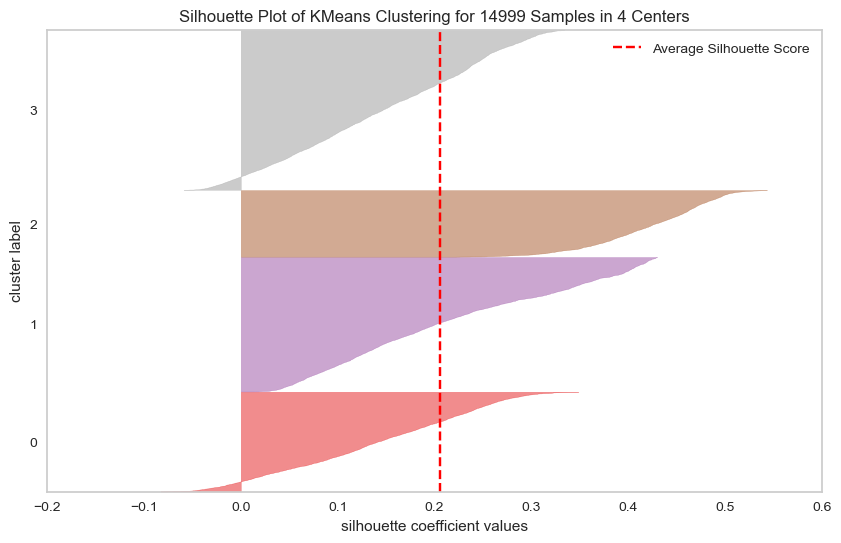

In [258]:
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

### Conclusion

In [259]:
X.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.32             0.27            0.00                  0.29   
1                0.78             0.78            0.60                  0.78   
2                0.02             0.81            1.00                  0.82   
3                0.69             0.80            0.60                  0.59   
4                0.31             0.25            0.00                  0.29   

   time_spend_company  work_accident  promotion_last_5years  departments  \
0                0.12           0.00                   0.00         0.78   
1                0.50           0.00                   0.00         0.78   
2                0.25           0.00                   0.00         0.78   
3                0.38           0.00                   0.00         0.78   
4                0.12           0.00                   0.00         0.78   

   salary  labels  
0    0.50       0  
1    1.00       0  
2    1.00       0  
3    0.50       0  
4    0.50       0

In [260]:
model2 = KMeans(n_clusters=4, random_state=42)

In [261]:
model2.fit_predict(X)

array([1, 3, 3, ..., 1, 3, 1])

In [262]:
X["left"] = y
X["predicted"] = model2.labels_

In [263]:
X.predicted.value_counts()

3    5204
1    4380
0    3246
2    2169
Name: predicted, dtype: int64

In [264]:
X.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.32             0.27            0.00                  0.29   
1                0.78             0.78            0.60                  0.78   
2                0.02             0.81            1.00                  0.82   
3                0.69             0.80            0.60                  0.59   
4                0.31             0.25            0.00                  0.29   

   time_spend_company  work_accident  promotion_last_5years  departments  \
0                0.12           0.00                   0.00         0.78   
1                0.50           0.00                   0.00         0.78   
2                0.25           0.00                   0.00         0.78   
3                0.38           0.00                   0.00         0.78   
4                0.12           0.00                   0.00         0.78   

   salary  labels  left  predicted  
0    0.50       0     1          1  
1    1.00       0     1          3  
2    1.00       0     1          3  
3    0.50       0     1          3  
4    0.50       0     1          1

<AxesSubplot:xlabel='predicted', ylabel='count'>

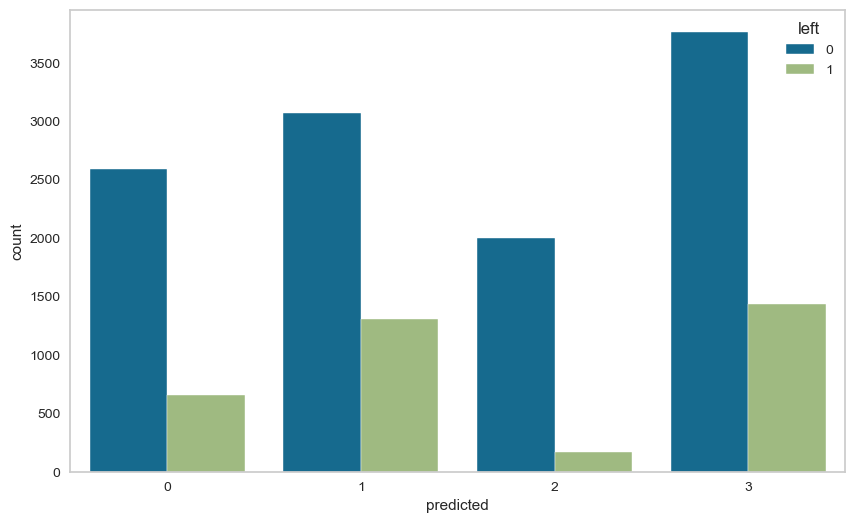

In [265]:
sns.countplot( data = X, x="predicted",hue=X.left)

In [266]:
X[X["left"] == 0]["predicted"].value_counts()

3    3767
1    3069
0    2592
2    2000
Name: predicted, dtype: int64

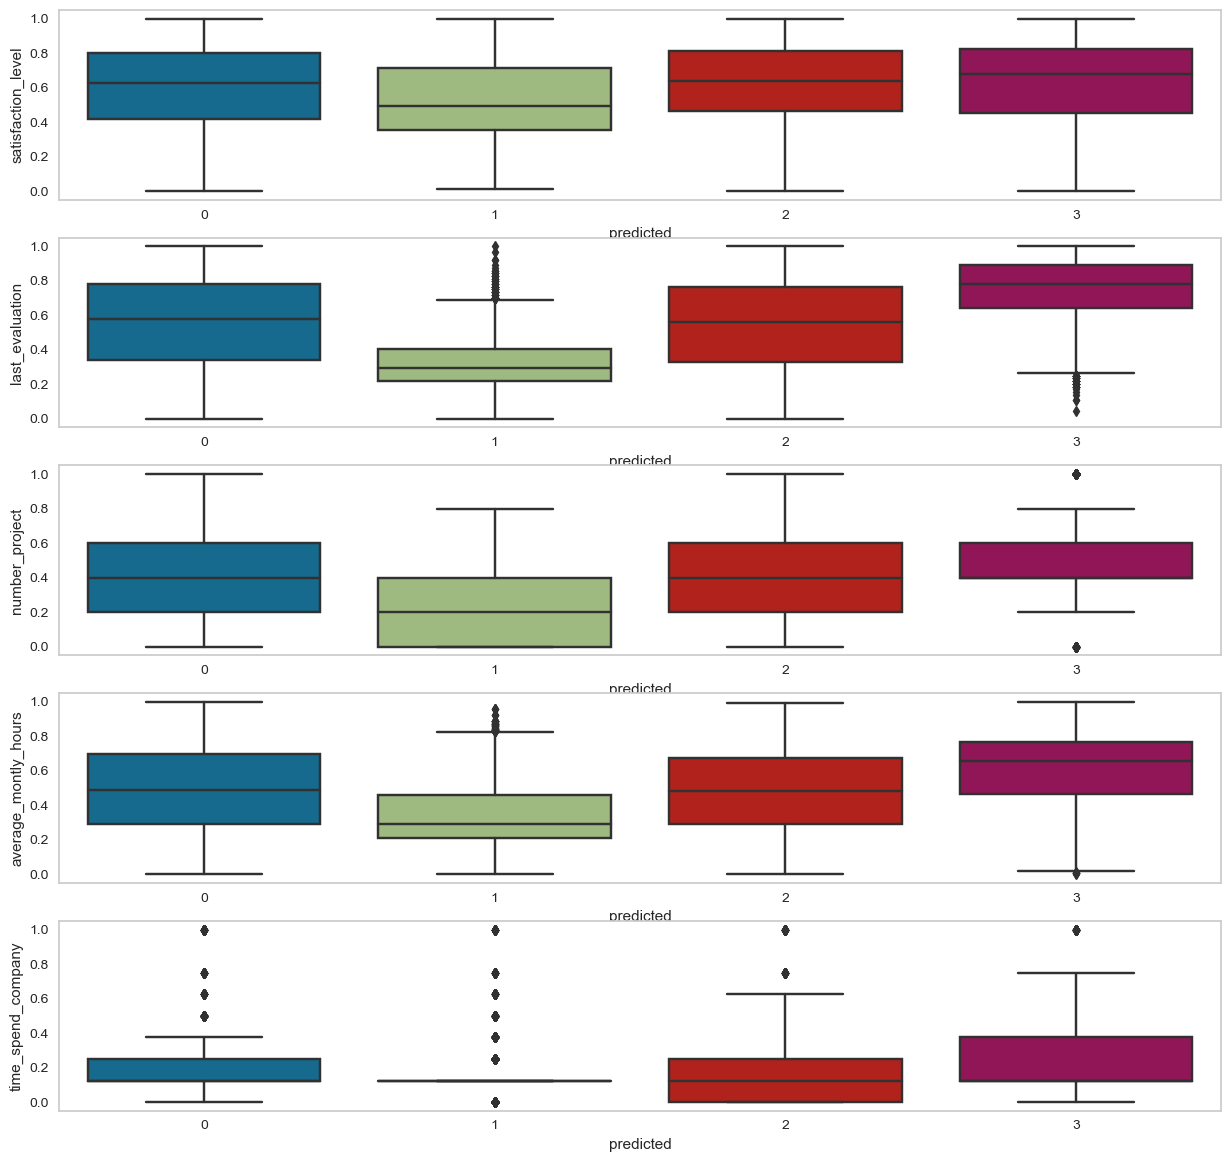

In [267]:
plt.figure(figsize=(15,35))

for i, j in enumerate(X.iloc[:,:5].columns):
    plt.subplot( len(X.columns),1, i+1)
    sns_plot = sns.boxplot(data = X,x =X.predicted, y=X[j])
    fig = sns_plot.get_figure()
# fig.savefig("ClusterStdSc.png")

- Employees labeled with 3 occurs from left employees mostly. So, we can say the employees who working for more than average hours in a month, building average number of projects, having well last evaluation and satisfaction level tend to leave. We can name they as "Lost Employees".
- Employees labeled with 1 look like 3 ones, in distribution of leaving situation. And there are same number of employees stayed in the company. But we may name them as "Lazybones". They worked less hours and built less projects than the average. Although one third of them stayed, the company should consider their effectiveness. 
<br>
- For the emloyess labeled with 0 and 2, most of them stayed in the company and they are on the average for all metrics. We can name they as "Loyal Employees".
<br>

From the insight of these classes, the company has to make better evaluations or lessen the job burden, to hold the employees. 

*However, we have to emphasize that this clustering is not enough to make a perfect insight. It is just a taking a glance.*

## Model Building

### Split Data as Train and Test Set

In [99]:
X = df.drop(columns="left")
y= df.left
X.shape, y.shape

((14999, 9), (14999,))

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify = y)

In [101]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (11999, 9)
Train target shape   :  (11999,)
Test features shape  :  (3000, 9)
Test target shape    :  (3000,)


### Implement Lazypredict

In [102]:
# ! pip install pyforest
# ! pip install lazypredict

In [103]:
import pyforest
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [104]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:35<00:00,  1.21s/it]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.99               0.98     0.98      0.99   
ExtraTreesClassifier               0.99               0.98     0.98      0.99   
BaggingClassifier                  0.99               0.98     0.98      0.99   
LGBMClassifier                     0.99               0.98     0.98      0.99   
DecisionTreeClassifier             0.98               0.97     0.97      0.98   
LabelPropagation                   0.97               0.97     0.97      0.97   
LabelSpreading                     0.97               0.97     0.97      0.97   
XGBClassifier                      0.98               0.96     0.96      0.98   
ExtraTreeClassifier                0.97               0.96     0.96      0.97   
SVC                                0.96               0.95     0.95      0.96   
AdaBoostClassifier                 0.96               0.95     0.95      0.96   
KNeighborsClassifier               0.94               0.94     0.94      0.95   
QuadraticDiscriminantAnalysis      0.85               0.84     0.84      0.85   
NearestCentroid                    0.75               0.74     0.74      0.76   
GaussianNB                         0.66               0.72     0.72      0.69   
LogisticRegression                 0.79               0.64     0.64      0.77   
LinearDiscriminantAnalysis         0.78               0.62     0.62      0.76   
CalibratedClassifierCV             0.78               0.61     0.61      0.75   
LinearSVC                          0.78               0.60     0.60      0.74   
RidgeClassifier                    0.78               0.60     0.60      0.74   
RidgeClassifierCV                  0.78               0.60     0.60      0.74   
SGDClassifier                      0.79               0.57     0.57      0.73   
BernoulliNB                        0.75               0.56     0.56      0.71   
Perceptron                         0.76               0.52     0.52      0.69   
PassiveAggressiveClassifier        0.76               0.52     0.52      0.68   
DummyClassifier                    0.76               0.50     0.50      0.66   

                               Time Taken  
Model                                      
RandomForestClassifier               0.98  
ExtraTreesClassifier                 1.12  
BaggingClassifier                    0.36  
LGBMClassifier                       0.49  
DecisionTreeClassifier               0.11  
LabelPropagation                     7.09  
LabelSpreading                      10.97  
XGBClassifier                        1.60  
ExtraTreeClassifier                  0.05  
SVC                                  3.52  
AdaBoostClassifier                   0.53  
KNeighborsClassifier                 0.38  
QuadraticDiscriminantAnalysis        0.11  
NearestCentroid                      0.04  
GaussianNB                           0.04  
LogisticRegression                   0.26  
LinearDiscriminantAnalysis           1.60  
CalibratedClassifierCV               3.73  
LinearSVC                            1.39  
RidgeClassifier                      0.18  
RidgeClassifierCV                    0.07  
SGDClassifier                        0.16  
BernoulliNB                          0.05  
Perceptron                           0.05  
PassiveAggressiveClassifier          0.07  
DummyClassifier                      0.05

### Define Useful Functions for Models

In [105]:
# define a function to compare evaluation metrics of models

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [106]:

from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import ConfusionMatrixDisplay, plot_confusion_matrix, confusion_matrix

def eval_metric_classification(model, X_train, y_train, X_test, y_test, model_name='', ml_model=True, average=None, labels=None):
    """ average (None, 'micro', 'macro', 'samples', 'weighted', 'binary')"""
    # The style parameters control properties like the color of the background and whether a grid is enabled by default.
    sns.set_style("whitegrid", {'axes.grid' : False})
    if ml_model:
      y_pred_test = model.predict(X_test)
      y_pred_train = model.predict(X_train)
    else:
      y_pred_test = model.predict(X_test) >= 0.5
      y_pred_train = model.predict(X_train) >= 0.5
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    fig, ax = plt.subplots(2, 1, figsize=(7, 7))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, ax=ax[0]);
    print("\n"*1, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, ax=ax[1]);
    plt.tight_layout()
    
    return pd.DataFrame.from_dict({
        'accuracy_test' :accuracy_score(y_test, y_pred_test),
        'f1_test'       :np.array(f1_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],
        'recall_test'   :np.array(recall_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],
        'precision_test':np.array(precision_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],        
        'accuracy_train' :accuracy_score(y_train, y_pred_train),
        'f1_train'       :np.array(f1_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],        
        'recall_train'   :np.array(recall_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],
        'precision_train':np.array(precision_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],
    }, orient='index', columns=[model_name]).T

## Distance Based Algorithm

### Data Preprocessing 

In [107]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import make_column_transformer, ColumnTransformer

scaler = MinMaxScaler()

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), ["departments"]),
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ["salary"]), 
    remainder='passthrough'
)

### SVC Model

#### Model Building

In [108]:
operations_svc = [("column_trans", column_trans), ('scaler', scaler), 
                  ("svc", SVC(class_weight="balanced", probability=True, random_state=random_state))]

pipe_svc_model = Pipeline(steps=operations_svc)

In [109]:
pipe_svc_model.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('scaler', MinMaxScaler()),
                ('svc',
                 SVC(class_weight='balanced', probability=True,
                     random_state=101))])

In [110]:
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[2117  169]
 [  49  665]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2286
           1       0.80      0.93      0.86       714

    accuracy                           0.93      3000
   macro avg       0.89      0.93      0.91      3000
weighted avg       0.93      0.93      0.93      3000


Train_Set
[[8621  521]
 [ 234 2623]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      9142
           1       0.83      0.92      0.87      2857

    accuracy                           0.94     11999
   macro avg       0.90      0.93      0.92     11999
weighted avg       0.94      0.94      0.94     11999



#### SVC Model Cross Validation

In [111]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores =  pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_f1  train_f1  \
0     18.05        0.81           0.94            0.94     0.87      0.87   
1     15.69        0.89           0.93            0.94     0.87      0.87   
2     20.02        0.81           0.93            0.94     0.87      0.87   
3     18.24        1.21           0.93            0.94     0.86      0.88   
4     17.32        1.32           0.93            0.94     0.86      0.87   

   test_recall  train_recall  test_precision  train_precision  
0         0.92          0.92            0.83             0.83  
1         0.92          0.92            0.82             0.83  
2         0.90          0.92            0.83             0.83  
3         0.91          0.92            0.82             0.84  
4         0.92          0.92            0.82             0.83

test_accuracy     0.93
train_accuracy    0.94
test_f1           0.87
train_f1          0.87
test_recall       0.91
train_recall      0.92
test_precision    0.82
train_precision   0.83
dtype: float64

#### SVC Model GridsearchCV

In [112]:
operations_svc = [("column_trans", column_trans),('scaler', scaler), 
                  ("svc", SVC(class_weight="balanced",probability=True, random_state=random_state))]

model = Pipeline(steps=operations_svc)

param_grid = {
    'svc__C': [100,150],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01],
#     'svc__kernel': ['poly', 'rbf'], # ['linear', 'poly', 'rbf']
#     'svc__degree': [2,3],
#     'svc__class_weight': ['balanced']
}

grid_svc_model = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring="recall",
                              n_jobs=-1)

In [113]:
grid_svc_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [100, 150],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring='recall', verbose=3)

In [114]:
grid_svc_model.best_params_

{'svc__C': 150, 'svc__gamma': 1}

In [115]:
grid_svc_model.best_score_

0.9475022350679094

#### Evaluating Model Performance and Tuning

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

In [116]:
eval_metric(grid_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[2197   89]
 [  33  681]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2286
           1       0.88      0.95      0.92       714

    accuracy                           0.96      3000
   macro avg       0.93      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000


Train_Set
[[8963  179]
 [  52 2805]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      9142
           1       0.94      0.98      0.96      2857

    accuracy                           0.98     11999
   macro avg       0.97      0.98      0.97     11999
weighted avg       0.98      0.98      0.98     11999



- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

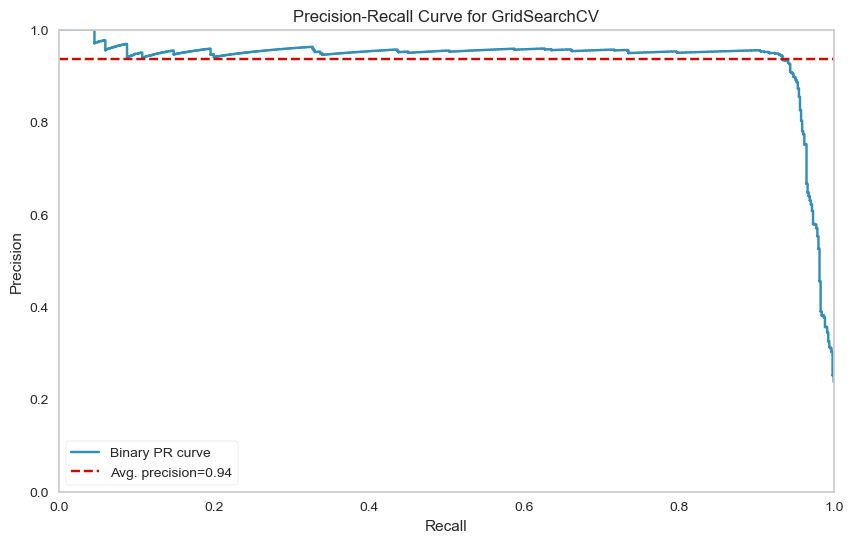

In [118]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    grid_svc_model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [119]:
# from sklearn.calibration import CalibratedClassifierCV

# calibrated_svc = CalibratedClassifierCV(
#     # base_estimator=LinearSVC(C=0.05, class_weight='balanced', random_state=101),
#     base_estimator=grid_svc_model, 
#     method='sigmoid',
#     cv=5, 
# )
# calibrated_svc.fit(X_train, y_train)

# y_probas = calibrated_svc.predict_proba(X_test)
# skplt.metrics.plot_precision_recall(y_test, y_probas)
# plt.show()

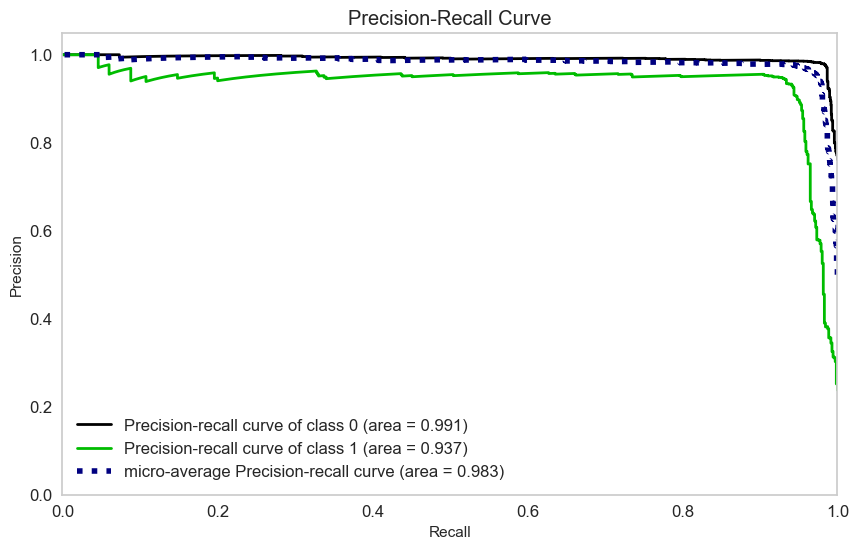

In [122]:
!pip install scikit-plot -q
import scikitplot as skplt
from scikitplot.metrics import plot_precision_recall

y_probas = grid_svc_model.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

#### Prediction

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2286
           1       0.88      0.95      0.92       714

    accuracy                           0.96      3000
   macro avg       0.93      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      9142
           1       0.94      0.98      0.96      2857

    accuracy                           0.98     11999
   macro avg       0.97      0.98      0.97     11999
weighted avg       0.98      0.98      0.98     11999



accuracy_test  f1_test  recall_test  precision_test  accuracy_train  \
SVC           0.96     0.92         0.95            0.88            0.98   

     f1_train  recall_train  precision_train  
SVC      0.96          0.98             0.94

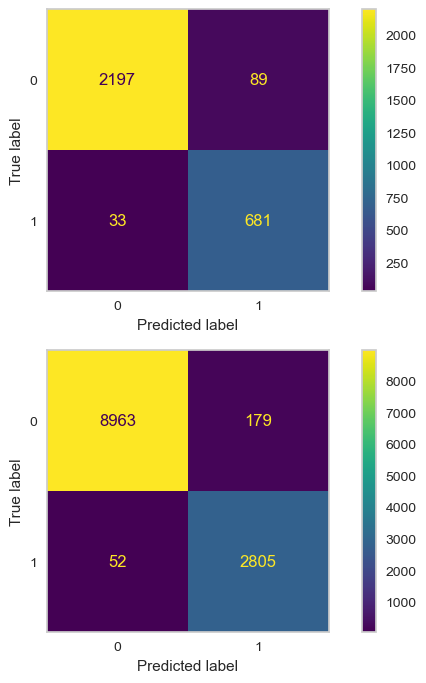

In [123]:
out_score_svc = eval_metric_classification(
    grid_svc_model, X_train, y_train, X_test, y_test, 
    'SVC', average=None, labels=[1]
)
out_score_svc

### KNN

#### Vanilla KNN

In [124]:
from sklearn.neighbors import KNeighborsClassifier

operations_knn = [("column_trans", column_trans), ('scaler', scaler), ("knn", KNeighborsClassifier())]

pipe_knn_model = Pipeline(steps=operations_knn)

In [125]:
pipe_knn_model.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [126]:
eval_metric(pipe_knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[2177  109]
 [  60  654]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2286
           1       0.86      0.92      0.89       714

    accuracy                           0.94      3000
   macro avg       0.92      0.93      0.92      3000
weighted avg       0.95      0.94      0.94      3000


Train_Set
[[8857  285]
 [ 165 2692]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      9142
           1       0.90      0.94      0.92      2857

    accuracy                           0.96     11999
   macro avg       0.94      0.96      0.95     11999
weighted avg       0.96      0.96      0.96     11999



#### KNN Model Cross Validation

In [127]:
model = Pipeline(steps=operations_knn)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores =  pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_f1  train_f1  \
0      0.03        0.58           0.94            0.96     0.88      0.92   
1      0.02        0.43           0.94            0.96     0.87      0.91   
2      0.02        0.45           0.93            0.96     0.85      0.91   
3      0.02        0.34           0.94            0.96     0.88      0.91   
4      0.02        0.40           0.94            0.96     0.88      0.91   

   test_recall  train_recall  test_precision  train_precision  
0         0.89          0.93            0.87             0.91  
1         0.90          0.93            0.85             0.90  
2         0.86          0.92            0.85             0.90  
3         0.88          0.92            0.88             0.90  
4         0.88          0.92            0.88             0.90

test_accuracy     0.94
train_accuracy    0.96
test_f1           0.87
train_f1          0.91
test_recall       0.88
train_recall      0.92
test_precision    0.86
train_precision   0.90
dtype: float64

#### Elbow Method for Choosing Reasonable K Values

In [128]:
test_error_rates = []

for k in range(1,30):
    operations_knn = [("column_trans", column_trans), ('scaler', scaler), ("KNN", KNeighborsClassifier(n_neighbors=k))]   
    pipe_knn_model = Pipeline(steps=operations_knn) # {'n_neighbors': 21, 'p': 2, 'weights': 'uniform'}
    pipe_knn_model.fit(X_train,y_train) 
   
    y_pred_test = pipe_knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    
    test_error_rates.append(test_error)

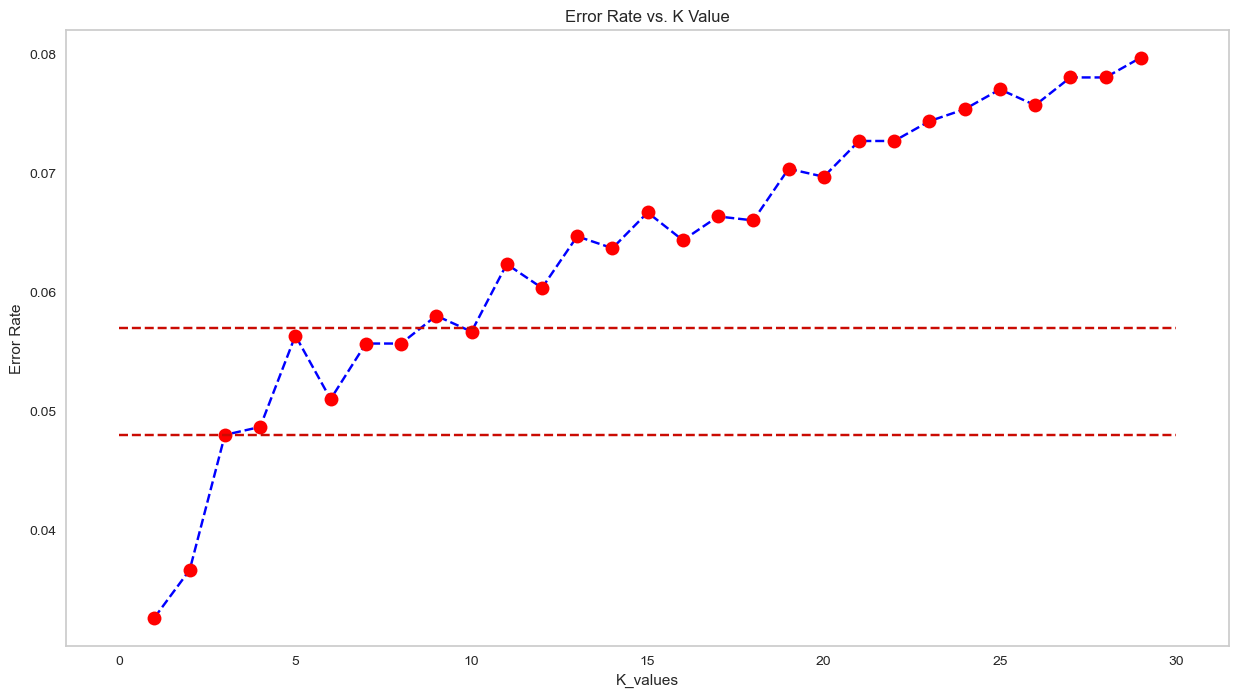

In [129]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.hlines(y=0.048, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [130]:
test_error_rates = []
train_error_rates = []

for k in range(1,30):
    operations_knn = [("column_trans", column_trans), ('scaler', scaler), ("KNN", KNeighborsClassifier(n_neighbors=k))]   
    pipe_knn_model = Pipeline(steps=operations_knn) 
    pipe_knn_model.fit(X_train,y_train) 
   
    y_pred_test = pipe_knn_model.predict(X_test)
    y_pred_train = pipe_knn_model.predict(X_train)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

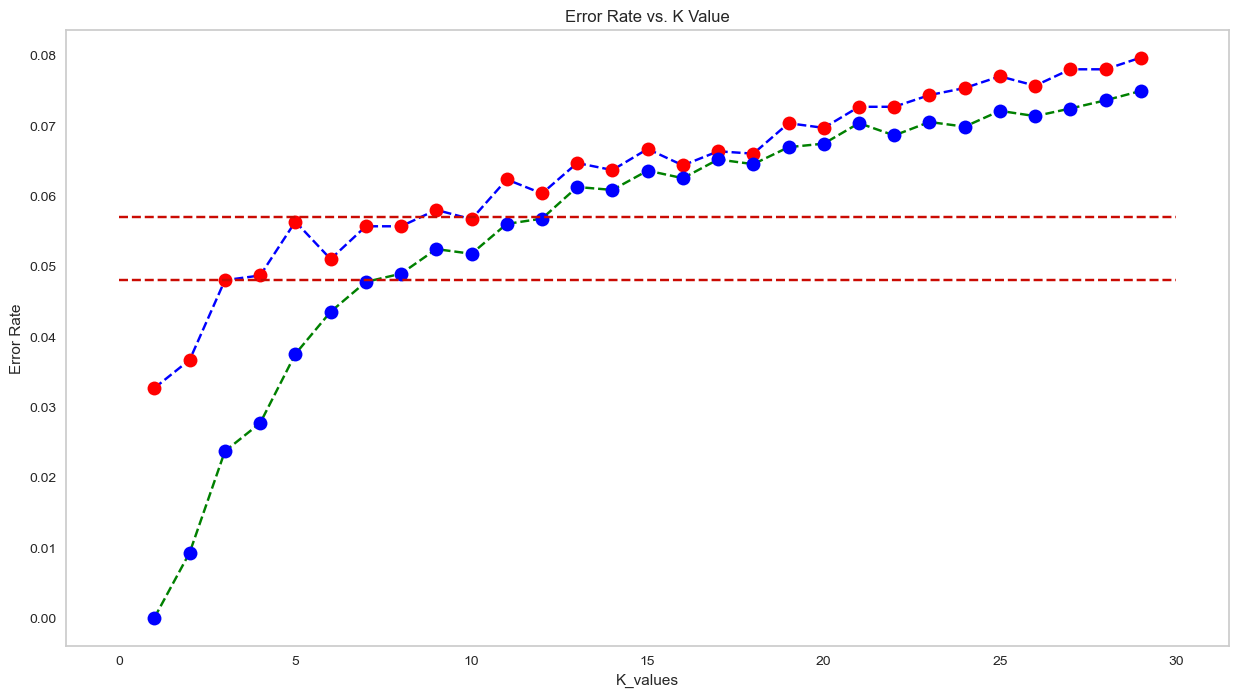

In [131]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.048, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

#### KNN GridsearchCV

In [132]:
# reset the pipe model
operations_knn = [("column_trans", column_trans), ('scaler', scaler), ("KNN", KNeighborsClassifier())]
model = Pipeline(operations_knn)

# defining the grid parameter
k_values = range(4,20)

param_grid = {'KNN__n_neighbors': k_values,
              'KNN__p': [1,2],
              'KNN__weights': ['uniform'],
              'KNN__metric': ['minkowski']
               }

# built KNN grid model
grid_knn_model = GridSearchCV(model, param_grid = param_grid, scoring="recall", cv=5, n_jobs=-1)

In [133]:
grid_knn_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('KNN', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'KNN__metric': ['minkowski'],
                         'KNN__n_neighbors': range(4, 20), 'KNN__p': [1, 2],
                         'KNN__weights': ['uniform']},
             scoring='recall')

In [134]:
grid_knn_model.best_params_

{'KNN__metric': 'minkowski',
 'KNN__n_neighbors': 7,
 'KNN__p': 1,
 'KNN__weights': 'uniform'}

In [135]:
grid_knn_model.best_score_

0.893254993692822

#### Evaluating Model Performance and Tuning

In [136]:
eval_metric(grid_knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[2181  105]
 [  55  659]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2286
           1       0.86      0.92      0.89       714

    accuracy                           0.95      3000
   macro avg       0.92      0.94      0.93      3000
weighted avg       0.95      0.95      0.95      3000


Train_Set
[[8852  290]
 [ 271 2586]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9142
           1       0.90      0.91      0.90      2857

    accuracy                           0.95     11999
   macro avg       0.93      0.94      0.94     11999
weighted avg       0.95      0.95      0.95     11999



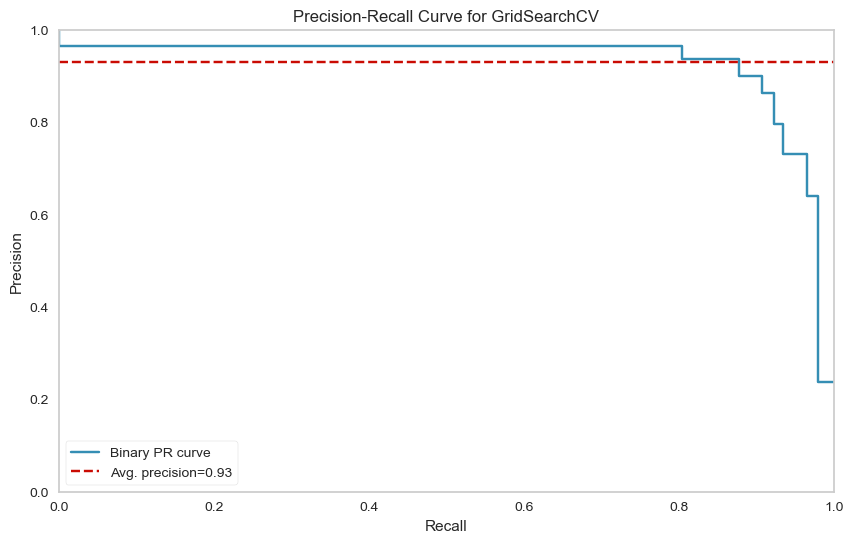

In [137]:
from yellowbrick.classifier import PrecisionRecallCurve


viz = PrecisionRecallCurve(
    grid_knn_model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

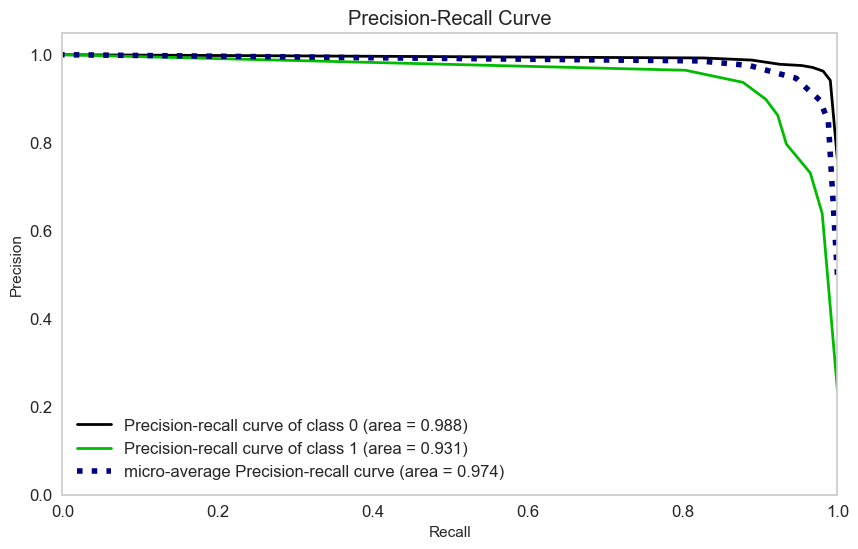

In [140]:
y_probas = grid_knn_model.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

#### Prediction

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2286
           1       0.86      0.92      0.89       714

    accuracy                           0.95      3000
   macro avg       0.92      0.94      0.93      3000
weighted avg       0.95      0.95      0.95      3000


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9142
           1       0.90      0.91      0.90      2857

    accuracy                           0.95     11999
   macro avg       0.93      0.94      0.94     11999
weighted avg       0.95      0.95      0.95     11999



accuracy_test  f1_test  recall_test  precision_test  accuracy_train  \
KNN           0.95     0.89         0.92            0.86            0.95   

     f1_train  recall_train  precision_train  
KNN      0.90          0.91             0.90

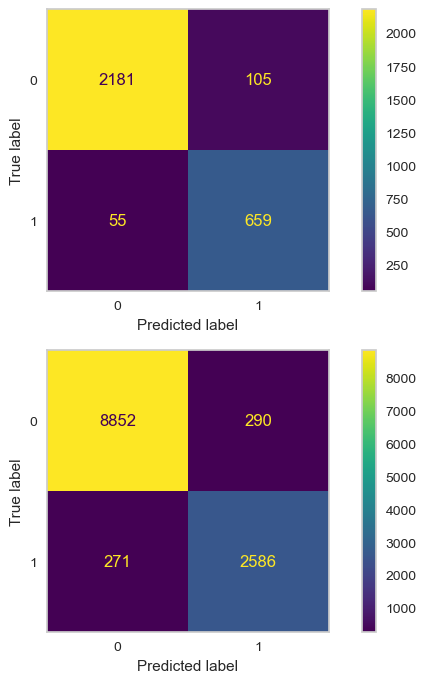

In [141]:
out_score_knn = eval_metric_classification(
    grid_knn_model, X_train, y_train, X_test, y_test, 
    'KNN', average=None, labels=[1]
)
out_score_knn

## Tree Based Models

### Random Forest Classifier

In [142]:
cat = X_train.select_dtypes("object").columns
cat

Index(['departments', 'salary'], dtype='object')

In [143]:
# defining column transformer object for tree based models without scaling, because these models doesn't need scaling

cat = X_train.select_dtypes("object").columns

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) 

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

#### Model Building

In [144]:
# built a pipe model for Random Forest with default hyperparameter

operations_rf = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=random_state))]

pipe_rf_model = Pipeline(steps=operations_rf)

In [145]:
# fit the RF model on train data

pipe_rf_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [146]:
# check the evaluation metrics of RF pipe model

eval_metric(pipe_rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[2282    4]
 [  23  691]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000


Train_Set
[[9142    0]
 [   0 2857]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       1.00      1.00      1.00      2857

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



#### Random Forest Model Cross Validation

In [147]:
model = Pipeline(steps=operations_rf)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores =  pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_f1  train_f1  \
0      1.19        0.08           0.99            1.00     0.98      1.00   
1      1.12        0.07           0.99            1.00     0.98      1.00   
2      0.89        0.05           0.99            1.00     0.97      1.00   
3      1.02        0.07           0.99            1.00     0.98      1.00   
4      0.99        0.07           0.99            1.00     0.98      1.00   

   test_recall  train_recall  test_precision  train_precision  
0         0.96          1.00            1.00             1.00  
1         0.98          1.00            0.99             1.00  
2         0.95          1.00            0.99             1.00  
3         0.97          1.00            0.99             1.00  
4         0.97          1.00            1.00             1.00

test_accuracy     0.99
train_accuracy    1.00
test_f1           0.98
train_f1          1.00
test_recall       0.97
train_recall      1.00
test_precision    0.99
train_precision   1.00
dtype: float64

####  GridSearchCV for Random Forest Model

In [148]:
# reset the model
operations_rf = [("OrdinalEncoder", column_trans), 
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=random_state))]

model = Pipeline(steps=operations_rf)

# define grid parameters
param_grid = {
            "RF_model__n_estimators":[10,50],  # np.arange(50,250,50)
            "RF_model__criterion":["entropy","gini"],
            "RF_model__max_features":['auto',"log2"],
            "RF_model__max_depth": [2,3,5,10],
            "RF_model__min_samples_split": [2, 5],
            "RF_model__min_samples_leaf" : [1, 5]}

# built RF grid model
grid_rf_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring="recall",
                          cv=5,
                          n_jobs = -1)

In [149]:
# # reset the model
# operations = [("OrdinalEncoder", column_trans), 
#               ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=random_state))]

# model = Pipeline(steps=operations)

# # define grid parameters
# param_grid = {
#             "RF_model__n_estimators":[10,50,100],  # np.arange(50,250,50)
#             "RF_model__criterion":["entropy","gini"],
#             "RF_model__max_features":['auto',"log2"],
#             "RF_model__max_depth": [2,3,5],
#             "RF_model__min_samples_split": [2, 5],
#             "RF_model__min_samples_leaf" : [1, 5]
#             }

# # built RF grid model
# RF_grid_model = GridSearchCV(estimator=model,
#                           param_grid=param_grid,
#                           scoring="recall",
#                           cv=5,
#                           n_jobs = -1)

In [150]:
# fit he RF grid model on train data

grid_rf_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['departments', 'salary'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__criterion': ['entropy', 'gini'],
                         'RF_model__max_depth': [2, 3, 5, 10],
                         'RF_model__max_features': ['auto', 'log2'],
                         'RF_model__min_samples_leaf': [1, 5],
                         'RF_model__min_samples_split': [2, 5],
                         'RF_model__n_estimators': [10, 50]},
             scoring='recall')

In [151]:
grid_rf_model.best_score_

0.9419059924313864

In [152]:
grid_rf_model.best_params_

{'RF_model__criterion': 'gini',
 'RF_model__max_depth': 10,
 'RF_model__max_features': 'auto',
 'RF_model__min_samples_leaf': 1,
 'RF_model__min_samples_split': 2,
 'RF_model__n_estimators': 10}

In [153]:
grid_rf_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        max_features='auto', n_estimators=10,
                                        random_state=101))])

#### Evaluating Model Performance and Tuning

In [154]:
# check the evaluation metrics of RF grid model

eval_metric(grid_rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[2273   13]
 [  36  678]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2286
           1       0.98      0.95      0.97       714

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.98      0.98      0.98      3000


Train_Set
[[9123   19]
 [  97 2760]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9142
           1       0.99      0.97      0.98      2857

    accuracy                           0.99     11999
   macro avg       0.99      0.98      0.99     11999
weighted avg       0.99      0.99      0.99     11999



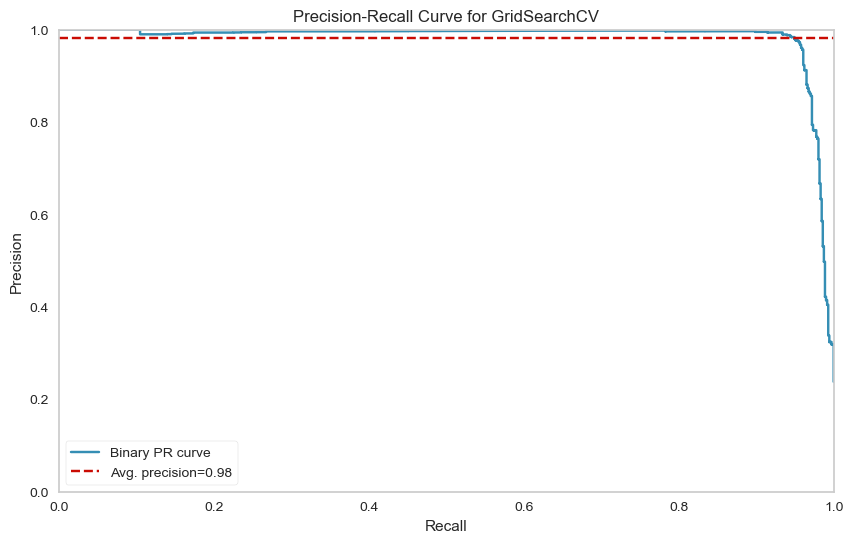

In [155]:
# precision-recall curve for RF grid model

from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    estimator=grid_rf_model,
    classes=grid_rf_model.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
viz.show();
# for class 1

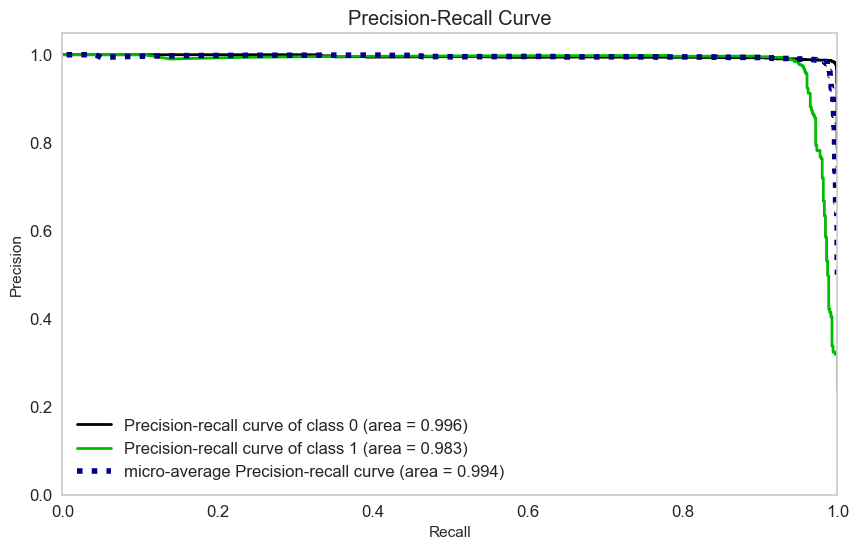

In [156]:
!pip install scikit-plot -q
import scikitplot as skplt
from scikitplot.metrics import plot_precision_recall

y_probas = grid_rf_model.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

#### Prediction

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2286
           1       0.98      0.95      0.97       714

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.98      0.98      0.98      3000


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9142
           1       0.99      0.97      0.98      2857

    accuracy                           0.99     11999
   macro avg       0.99      0.98      0.99     11999
weighted avg       0.99      0.99      0.99     11999



accuracy_test  f1_test  recall_test  precision_test  \
Random Forest           0.98     0.97         0.95            0.98   

               accuracy_train  f1_train  recall_train  precision_train  
Random Forest            0.99      0.98          0.97             0.99

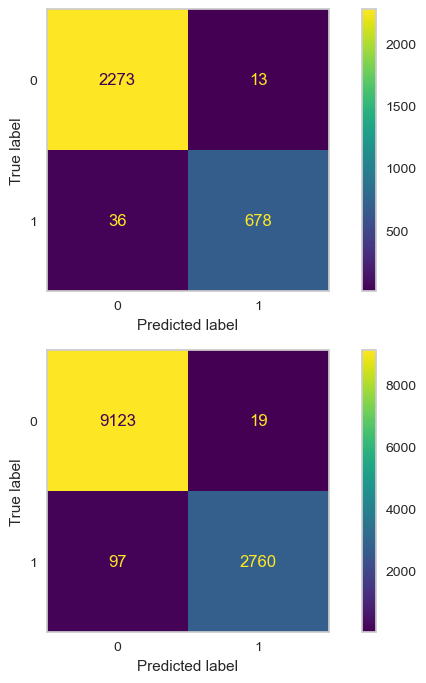

In [238]:
out_score_rf = eval_metric_classification(
    grid_rf_model, X_train, y_train, X_test, y_test, 
    'Random Forest', average=None, labels=[1]
)
out_score_rf

### XGBoost Classifier

In [158]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights  # to show all class weights
# pd.Series(classes_weights).unique() # to show unique class weights

array([0.65625684, 0.65625684, 0.65625684, ..., 0.65625684, 2.09993   ,
       0.65625684])

#### Model Building

In [160]:
# # built XGB pipe model

operations_xgb = [("OrdinalEncoder", column_trans),
               ("XGB_model", XGBClassifier(random_state=random_state))]

pipe_xgb_model = Pipeline(steps=operations_xgb)

In [161]:
# fit the XGB pipe model on train data

pipe_xgb_model.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('XGB_model', XGBClassifier(random_state=101))])

In [162]:
# check the evaluation metrics of RF pipe model

eval_metric(pipe_xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[2214   72]
 [  38  676]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.90      0.95      0.92       714

    accuracy                           0.96      3000
   macro avg       0.94      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000


Train_Set
[[8939  203]
 [ 174 2683]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9142
           1       0.93      0.94      0.93      2857

    accuracy                           0.97     11999
   macro avg       0.96      0.96      0.96     11999
weighted avg       0.97      0.97      0.97     11999



#### Cross Validation for XGB Model

In [163]:
model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, X_train, y_train, scoring = scoring, 
                        fit_params={"XGB_model__sample_weight":classes_weights},
                        cv = 5, return_train_score=True)

df_scores =  pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_f1  train_f1  \
0      0.80        0.03           0.97            0.97     0.94      0.93   
1      0.85        0.02           0.96            0.97     0.93      0.93   
2      0.92        0.03           0.96            0.97     0.92      0.93   
3      0.70        0.02           0.96            0.97     0.92      0.94   
4      0.78        0.02           0.97            0.97     0.93      0.93   

   test_recall  train_recall  test_precision  train_precision  
0         0.95          0.94            0.93             0.93  
1         0.94          0.94            0.91             0.93  
2         0.92          0.94            0.93             0.93  
3         0.94          0.94            0.91             0.93  
4         0.93          0.94            0.93             0.92

test_accuracy     0.97
train_accuracy    0.97
test_f1           0.93
train_f1          0.93
test_recall       0.94
train_recall      0.94
test_precision    0.92
train_precision   0.93
dtype: float64

####  GridSearchCV for XGBoost Model

In [164]:
# reset the model
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=random_state))]

model = Pipeline(steps=operations_xgb)

# define grid parameters
param_grid = {"XGB_model__n_estimators":np.linspace(20, 150, 5, dtype=int),
              'XGB_model__max_depth':np.arange(1,4,1),
              "XGB_model__learning_rate": np.linspace(0.01, 1, 4).round(3),
              "XGB_model__subsample":np.arange(0.8,1,2),
              "XGB_model__colsample_bytree":np.linspace(0.8,1,2) # Subsample ratio of columns when constructing each tree.
             }

# param_grid = {"XGB_model__n_estimators":[50, 100],
#               'XGB_model__max_depth':[1,2],
#               "XGB_model__learning_rate": [0.1, 0.3],
#               "XGB_model__subsample":[0.8, 1],
#               "XGB_model__colsample_bytree":[0.8, 1]}

# built RF grid model
grid_xgb_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = 'recall',    
    n_jobs = -1,
    cv=5,
    verbose=2
)

In [165]:
# fit he RF grid model on train data

grid_xgb_model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['departments', 'salary'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': array([0.8, 1. ]),
                         'XGB_model__learning_rate': array([0.01, 0.34, 0.67, 1.  ]),
                         'XGB_model__max_depth': array([1, 2, 3]),
                         'XGB_model__n_estimators': array([ 20,  52,  85, 117, 150]),
                         'XGB_model__subsample': array([0.8])},
             scoring='recall', verbose=2)

In [166]:
grid_xgb_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(colsample_bytree=1.0, learning_rate=1.0,
                               n_estimators=150, random_state=101,
                               subsample=0.8))])

In [167]:
grid_xgb_model.best_params_

{'XGB_model__colsample_bytree': 1.0,
 'XGB_model__learning_rate': 1.0,
 'XGB_model__max_depth': 3,
 'XGB_model__n_estimators': 150,
 'XGB_model__subsample': 0.8}

In [168]:
grid_xgb_model.best_score_

0.9748000685829057

#### Evaluating Model Performance and Tuning

In [169]:
# check the evaluation metrics of XGB grid model

eval_metric(grid_xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[2243   43]
 [  22  692]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2286
           1       0.94      0.97      0.96       714

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000


Train_Set
[[9108   34]
 [   8 2849]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       0.99      1.00      0.99      2857

    accuracy                           1.00     11999
   macro avg       0.99      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



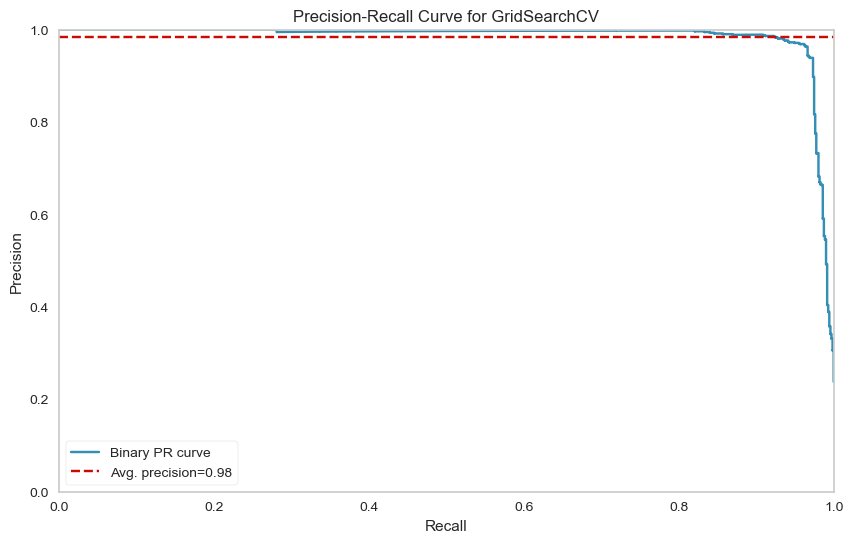

In [170]:
# precision-recall curve for RF grid model

from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    estimator=grid_xgb_model,
    classes=grid_xgb_model.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
viz.show();
# for class 1

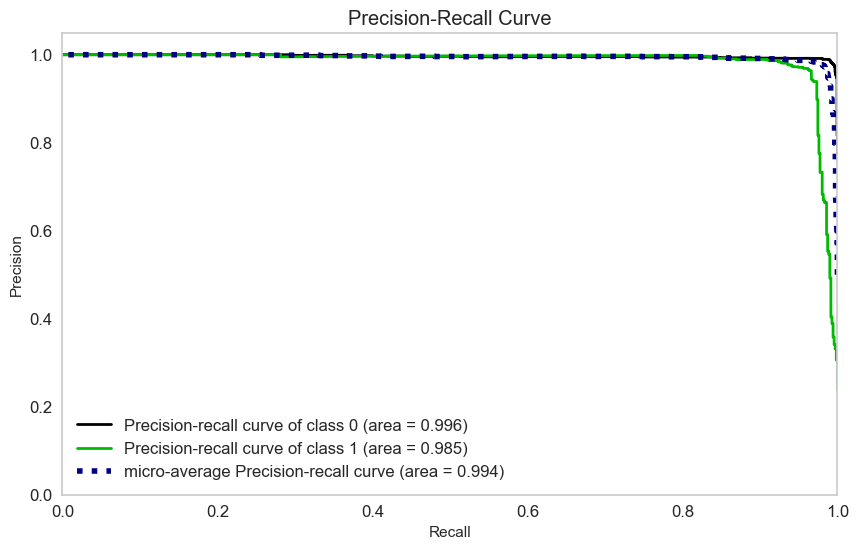

In [171]:
!pip install scikit-plot -q
import scikitplot as skplt
from scikitplot.metrics import plot_precision_recall

y_probas = grid_xgb_model.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

#### Prediction

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2286
           1       0.94      0.97      0.96       714

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       0.99      1.00      0.99      2857

    accuracy                           1.00     11999
   macro avg       0.99      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



accuracy_test  f1_test  recall_test  precision_test  accuracy_train  \
XGBoost           0.98     0.96         0.97            0.94            1.00   

         f1_train  recall_train  precision_train  
XGBoost      0.99          1.00             0.99

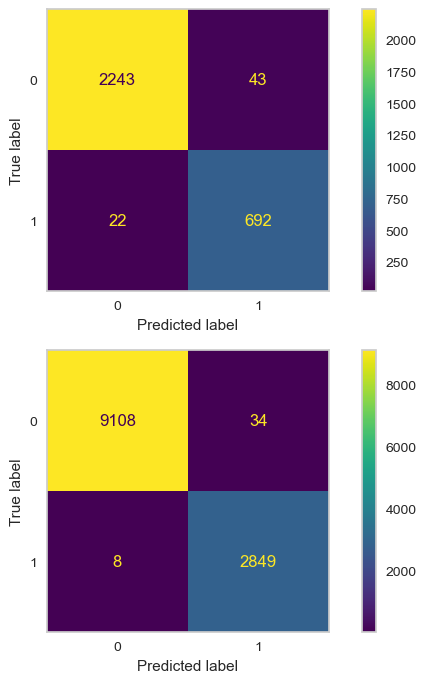

In [236]:
out_score_xgb = eval_metric_classification(
    grid_xgb_model, X_train, y_train, X_test, y_test, 
    'XGBoost', average=None, labels=[1]
)
out_score_xgb

### ANN Classifier

### Import Libraries

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
# from keras.optimizers import Adam, Nadam, RMSprop, Nadam

# !pip install scikeras[tensorflow]
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier # deprecated


from sklearn.metrics import  SCORERS, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [10]:
X = df.drop(columns="left")
y = df.left

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)
X_train.shape, X_test.shape

((11999, 9), (3000, 9))

In [12]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (11999, 9)
Train target shape   :  (11999,)
Test features shape  :  (3000, 9)
Test target shape    :  (3000,)


### Define Useful Function

In [13]:
def save_pipeline_keras(pipe_model, folder_name='.'):
    os.makedirs(folder_name, exist_ok=True) 
    
    import pickle   
    pickle.dump(pipe_model['column_trans'], open(folder_name+'/column_trans.pkl','wb'))
    pickle.dump(pipe_model['scaler'], open(folder_name+'/scaler.pkl','wb'))
    pipe_model['ann'].save(folder_name+'/churn_pred.h5')

In [14]:
def load_pipeline_keras(model, scaler=None, column_trans=None, folder_name='.'):
    from tensorflow.keras.models import load_model
    from sklearn.pipeline import Pipeline
    import pickle
    
    if scaler:
        scaler = pickle.load(open(folder_name+'/'+scaler, 'rb'))
    if column_trans:
        column_trans = pickle.load(open(folder_name+'/'+column_trans, 'rb'))   
        
    model = load_model('churn_pred.h5')
    
    return Pipeline(steps=[
        ("column_trans", column_trans), 
        ("scaler", scaler), 
        ("ann", model)])

#### Layer Architecture Building and Compiling

In [15]:
# def build_classifier(input_dim):
#     import tensorflow as tf
#     tf.keras.backend.clear_session()
#     tf.random.set_seed(101)
    
#     classifier = Sequential()
#     classifier.add(Dense(units = 36, activation = 'relu', input_dim = input_dim))
#     classifier.add(Dense(units = 18, activation = 'relu'))
#     classifier.add(Dense(units = 9, activation = 'relu'))
#     classifier.add(Dense(units = 1, activation = 'sigmoid'))
#     classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['Recall'])
#     return classifier

In [16]:
def build_classifier_model(
        optimizer: tf.keras.optimizers.Optimizer,
        learning_rate: float = 1e-3,
        input_dim: int = 18,
) -> tf.keras.models.Model:  # assign func. type
    
#     from tensorflow.keras.optimizers import Adam, Nadam, RMSprop, Adadelta
#     from keras.optimizers import Adam, Nadam, RMSprop, Nadam
    import tensorflow as tf
    import numpy as np
    tf.keras.backend.clear_session()
    tf.random.set_seed(101)
    np.random.seed(101)
    
    model = Sequential()
    model.add(Dense(units = 32, activation = 'relu', input_dim = input_dim))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(units = 16, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(units = 8, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    model.compile(optimizer = optimizer(learning_rate = learning_rate), 
                  loss = 'binary_crossentropy', 
                  metrics = ['Recall'], 
                  weighted_metrics=['Recall'])
    return model

In [19]:
# select 'TPU' or 'GPU' etc.
if tf.config.list_physical_devices('GPU'):
    strategy = tf.distribute.MirroredStrategy()
else:  # Use the Default Strategy
    strategy = tf.distribute.get_strategy()

with strategy.scope():  
    from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
    from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
    from sklearn.compose import make_column_transformer, ColumnTransformer
    from sklearn.pipeline import Pipeline

    column_trans = make_column_transformer(
        (OneHotEncoder(handle_unknown="ignore", sparse=False), ["departments"]),
        (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ["salary"]), 
        remainder='passthrough',
    )
    # pd.DataFrame(data=column_trans.fit_transform(X_train), columns=column_trans.get_feature_names_out())
    
    scaler = MinMaxScaler()

    model = build_classifier_model(Adam)
    
    pipe_ann = Pipeline(steps=[
        ("column_trans", column_trans), 
        ("scaler", scaler), 
        ("ann", model)
    ])    
#     display(pipe_ann.get_params())

In [20]:
# pipe_ann['ann'].summary()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                608       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 16)                0

In [21]:
from sklearn.utils import class_weight

class_weights = dict(
    zip(np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(y_train), 
            y = y_train)
))
class_weights

{0: 0.6562568365784293, 1: 2.099929996499825}

In [22]:
# from sklearn.utils import class_weight
# sample_weight = class_weight.compute_sample_weight(class_weight={0: 0.6, 1: 2.1}, y=y_train)
# sample_weight

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode="min", 
                           verbose = 1, patience = 5, restore_best_weights=True)

In [24]:
%%time
pipe_ann.fit(X_train, y_train, ann__validation_split = 0.1, ann__batch_size = 32, ann__epochs = 500, ann__verbose = 1,
          ann__callbacks = [early_stop], ann__class_weight=class_weights)

Epoch 1/500
338/338 [==============================] - 4s 4ms/step - loss: 0.5395 - recall: 0.7409 - recall_1: 0.7409 - val_loss: 0.3584 - val_recall: 0.6895 - val_recall_1: 0.6895
Epoch 2/500
338/338 [==============================] - 1s 3ms/step - loss: 0.3584 - recall: 0.8534 - recall_1: 0.8534 - val_loss: 0.2914 - val_recall: 0.9020 - val_recall_1: 0.9020
Epoch 3/500
338/338 [==============================] - 1s 3ms/step - loss: 0.3145 - recall: 0.8793 - recall_1: 0.8793 - val_loss: 0.2912 - val_recall: 0.9085 - val_recall_1: 0.9085
Epoch 4/500
338/338 [==============================] - 1s 4ms/step - loss: 0.2841 - recall: 0.8883 - recall_1: 0.8883 - val_loss: 0.2470 - val_recall: 0.9118 - val_recall_1: 0.9118
Epoch 5/500
338/338 [==============================] - 1s 3ms/step - loss: 0.2675 - recall: 0.9000 - recall_1: 0.9000 - val_loss: 0.2711 - val_recall: 0.9150 - val_recall_1: 0.9150
Epoch 6/500
338/338 [==============================] - 1s 4ms/step - loss: 0.2556 - recall: 0.9

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('scaler', MinMaxScaler()),
                ('ann',
                 <keras.engine.sequential.Sequential object at 0x0000020F3F1ACA00>)])

In [193]:
save_pipeline_keras(pipe_ann)

<IPython.core.display.Javascript object>

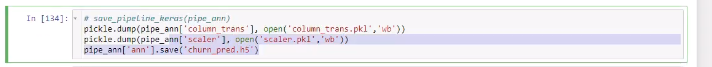

In [194]:
# import pickle
# pickle.dump(pipe_ann[:-1], open("encode_and_scale.pkl", 'wb'))
# model.save('churn_pred.h5')

In [25]:
# summary = pd.DataFrame(pipe_ann['ann'].history.history)
summary = pd.DataFrame(model.history.history)
summary

loss  recall  recall_1  val_loss  val_recall  val_recall_1
0   0.54    0.74      0.74      0.36        0.69          0.69
1   0.36    0.85      0.85      0.29        0.90          0.90
2   0.31    0.88      0.88      0.29        0.91          0.91
3   0.28    0.89      0.89      0.25        0.91          0.91
4   0.27    0.90      0.90      0.27        0.92          0.92
5   0.26    0.91      0.91      0.23        0.91          0.91
6   0.25    0.91      0.91      0.22        0.92          0.92
7   0.24    0.91      0.91      0.22        0.92          0.92
8   0.23    0.91      0.91      0.20        0.92          0.92
9   0.23    0.92      0.92      0.20        0.92          0.92
10  0.22    0.91      0.91      0.19        0.92          0.92
11  0.22    0.92      0.92      0.19        0.92          0.92
12  0.23    0.91      0.91      0.20        0.92          0.92
13  0.22    0.92      0.92      0.20        0.92          0.92
14  0.22    0.92      0.92      0.20        0.93          0.93
15  0.21    0.92      0.92      0.19        0.92          0.92
16  0.21    0.92      0.92      0.18        0.93          0.93
17  0.21    0.93      0.93      0.19        0.92          0.92
18  0.21    0.92      0.92      0.18        0.92          0.92
19  0.20    0.92      0.92      0.17        0.92          0.92
20  0.21    0.92      0.92      0.17        0.92          0.92
21  0.20    0.92      0.92      0.17        0.92          0.92
22  0.20    0.93      0.93      0.17        0.92          0.92
23  0.19    0.93      0.93      0.19        0.92          0.92
24  0.20    0.93      0.93      0.17        0.92          0.92
25  0.20    0.92      0.92      0.17        0.92          0.92
26  0.20    0.92      0.92      0.17        0.92          0.92
27  0.20    0.92      0.92      0.17        0.92          0.92

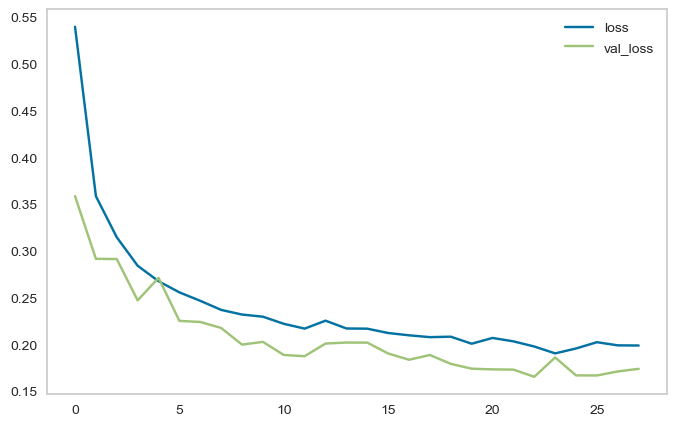

In [26]:
summary[["loss", "val_loss"]].plot(figsize=(8, 5));
plt.show()

In [27]:
model.metrics_names

['loss', 'recall', 'recall_1']

In [28]:
# metrics = ['loss', 'binary_accuracy', 'recall', 'precision', 'auc', 'precision_at_recall']
# colors  = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_metrics(history, metrics_names):
    for n, metric in enumerate(metrics_names):
        name = str(metric).replace("_"," ").capitalize()
        plt.subplot(3, 2, n+1)
        plt.plot(history.epoch, history.history[metric], 
                 color='xkcd:dodger blue', label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color='salmon', ls="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name, fontsize=12)
        plt.legend()
        plt.tight_layout(pad=0.3)
        if metric == 'loss':
            plt.ylim(top=plt.ylim()[1])
        else: # plt.ylim(plt.gca().get_ylim())
            plt.ylim(bottom=plt.ylim()[0])

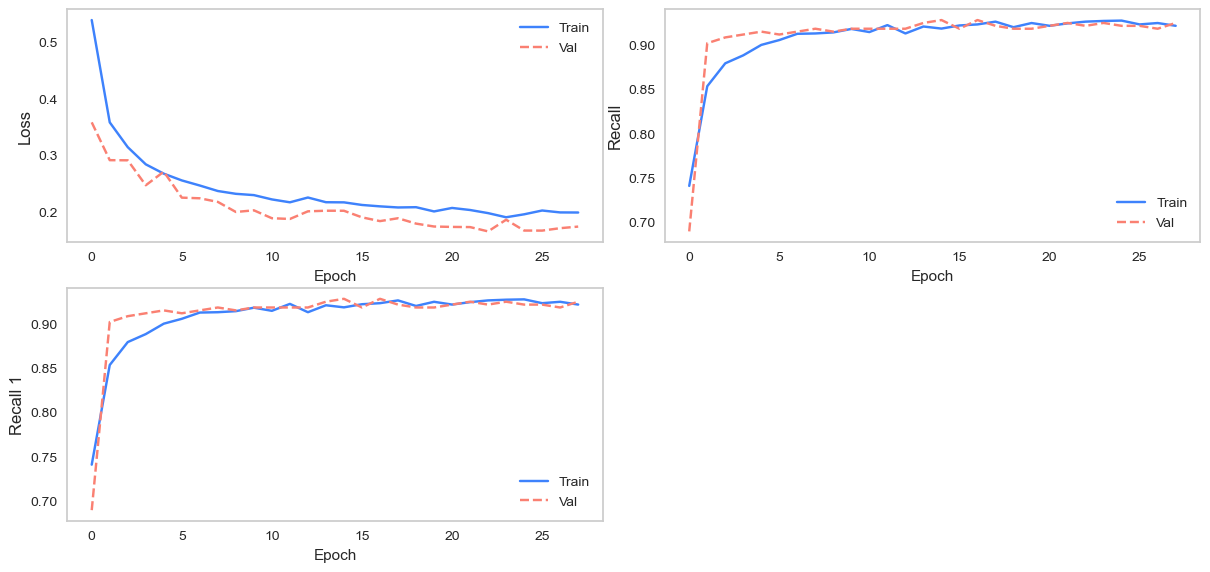

In [29]:
metrics = summary.columns[:6]
plt.figure(figsize=(12, 8))
plot_metrics(history=model.history, metrics_names=model.metrics_names)

In [30]:
print(pipe_ann[-1].evaluate((pipe_ann[:-1].transform(X_test)), y_test, verbose=0, return_dict=1),
      pipe_ann[-1].evaluate((pipe_ann[:-1].transform(X_train)), y_train, verbose=0, return_dict=1), sep='\n')

{'loss': 0.1782623529434204, 'recall': 0.9369747638702393, 'recall_1': 0.9369747638702393}
{'loss': 0.14348800480365753, 'recall': 0.9348967671394348, 'recall_1': 0.9348967671394348}


In [200]:
from sklearn.metrics import confusion_matrix, classification_report

print('TEST')
y_pred = pipe_ann.predict(X_test) >= 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------")
print('TRAIN')
y_train_pred = pipe_ann.predict(X_train) >= 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

TEST
94/94 [==============================] - 1s 1ms/step
[[2180  106]
 [  55  659]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2286
           1       0.86      0.92      0.89       714

    accuracy                           0.95      3000
   macro avg       0.92      0.94      0.93      3000
weighted avg       0.95      0.95      0.95      3000

-------------------------------------------------------
TRAIN
375/375 [==============================] - 1s 1ms/step
[[8846  296]
 [ 209 2648]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      9142
           1       0.90      0.93      0.91      2857

    accuracy                           0.96     11999
   macro avg       0.94      0.95      0.94     11999
weighted avg       0.96      0.96      0.96     11999



94/94 [==============================] - 0s 2ms/step


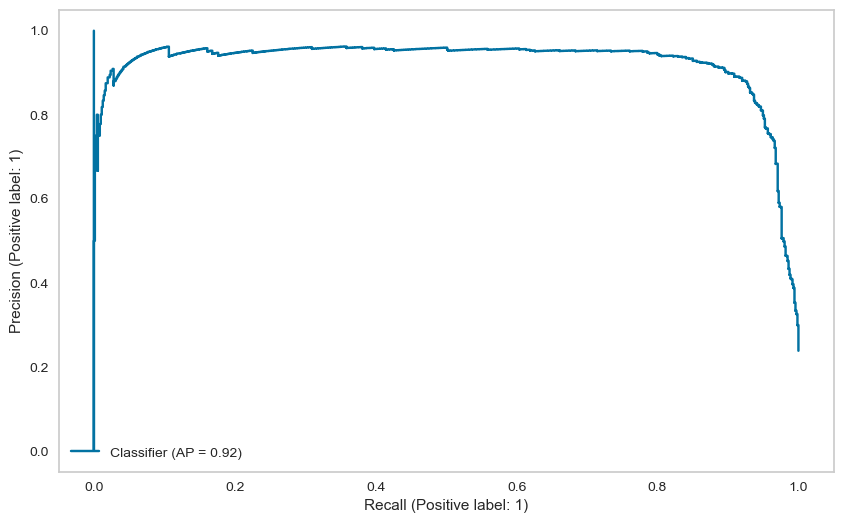

In [31]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = pipe_ann.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

94/94 [==============================] - 0s 2ms/step


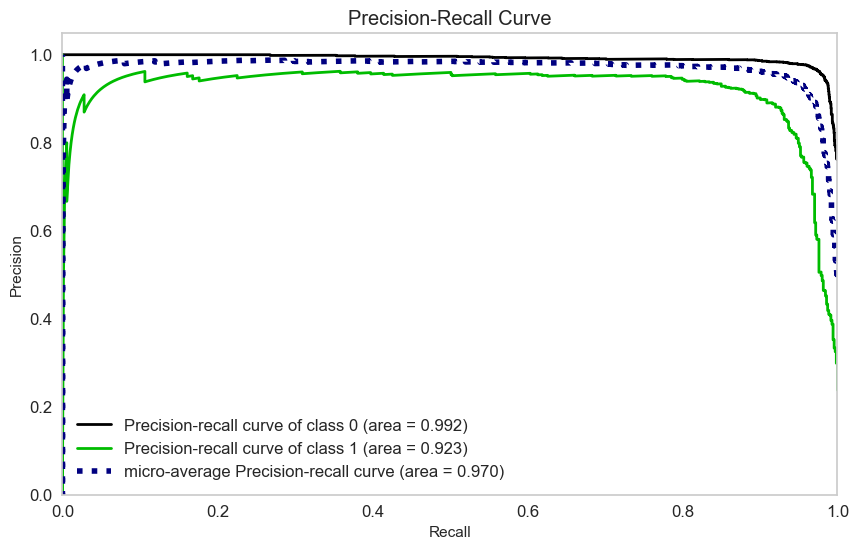

In [32]:
# !pip install scikit-plot -q
import scikitplot as skplt

y_pred_proba = pipe_ann.predict(X_test)
skplt.metrics.plot_precision_recall(y_test, np.hstack([(1-y_pred_proba), y_pred_proba]))
plt.show()

#### Cross Validation for ANN

In [33]:
# !pip install scikeras[tensorflow]
from scikeras.wrappers import KerasClassifier, KerasRegressor
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
# from keras.optimizers import Adam, Nadam, RMSprop, Nadam

# classifier = KerasClassifier(
#     build_fn = build_classifier, input_dim=18, validation_split = .1, batch_size = 32, epochs = 2000, verbose=1, 
#     callbacks = [early_stop], class_weight = class_weights,
# )
classifier = KerasClassifier(
    model = lambda: build_classifier_model(Adam), validation_split = .1, batch_size = 32, epochs = 2000, verbose=1, 
    callbacks = [early_stop], class_weight = class_weights,
)

model = Pipeline(steps=[
    ("column_trans", column_trans), 
    ("scaler", scaler), 
    ("ann", classifier)
]) 

scoring = {
    'precision_1': make_scorer(precision_score, average=None, labels=[1]),
    'recall_1': make_scorer(recall_score, average=None, labels=[1]),
    'f1_1': make_scorer(f1_score, average=None, labels=[1]),
    'accuracy': make_scorer(accuracy_score)
#     ,'neg_log_loss': 'neg_log_loss'
} # or make_scorer(log_loss, greater_is_better=False, needs_proba=True)

scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    return_train_score=True,
    error_score="raise",
    n_jobs=-1,
    cv=5,
#     fit_params={"ann__sample_weight":sample_weight}
)

df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

INFO:tensorflow:Assets written to: C:\Users\EMREEL~1\AppData\Local\Temp\tmp688ry250\assets
INFO:tensorflow:Assets written to: C:\Users\EMREEL~1\AppData\Local\Temp\tmpe0ofdurj\assets
INFO:tensorflow:Assets written to: C:\Users\EMREEL~1\AppData\Local\Temp\tmpkqicmmxm\assets
INFO:tensorflow:Assets written to: C:\Users\EMREEL~1\AppData\Local\Temp\tmpl_qwxoir\assets
INFO:tensorflow:Assets written to: C:\Users\EMREEL~1\AppData\Local\Temp\tmp4u44m1vx\assets
INFO:tensorflow:Assets written to: C:\Users\EMREEL~1\AppData\Local\Temp\tmp_t1s14j7\assets
INFO:tensorflow:Assets written to: C:\Users\EMREEL~1\AppData\Local\Temp\tmp9aj4l3w9\assets
INFO:tensorflow:Assets written to: C:\Users\EMREEL~1\AppData\Local\Temp\tmpoc22r_ab\assets
INFO:tensorflow:Assets written to: C:\Users\EMREEL~1\AppData\Local\Temp\tmphb49cuo8\assets
INFO:tensorflow:Assets written to: C:\Users\EMREEL~1\AppData\Local\Temp\tmpfsv7qwn1\assets


test_precision_1    0.86
train_precision_1   0.88
test_recall_1       0.93
train_recall_1      0.94
test_f1_1           0.89
train_f1_1          0.91
test_accuracy       0.95
train_accuracy      0.96
dtype: float64

#### With Best Parameters (GridsearchCV)

why fit sample_weight:
- https://www.adriangb.com/scikeras/stable/generated/scikeras.wrappers.KerasClassifier.html

why compile weighted_metrics:
- https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

In [48]:
# !pip install scikeras[tensorflow]
from scikeras.wrappers import KerasClassifier, KerasRegressor
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

classifier = KerasClassifier(
    model = build_classifier_model, validation_split = .1, epochs = 50, verbose = 1, 
    callbacks = [early_stop], class_weight = class_weights
)

model = Pipeline(steps=[
    ("column_trans", column_trans), 
    ("scaler", scaler), 
    ("ann", classifier)
]) 

param_grid = {
    'ann__batch_size': [32],
    'ann__model__optimizer': [Nadam],
    'ann__model__learning_rate': [0.001, 0.002],
}

grid_model = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    scoring='recall', # 'neg_log_loss'
#     error_score="raise",
    verbose = 1,
    n_jobs=-1,
    cv=5
) 
# grid_model.estimator.get_params().keys()

In [49]:
%%time
grid_model.fit(X_train, y_train)

INFO:tensorflow:Assets written to: C:\Users\EMREEL~1\AppData\Local\Temp\tmptv7owplf\assets
Fitting 5 folds for each of 2 candidates, totalling 10 fits
INFO:tensorflow:Assets written to: C:\Users\EMREEL~1\AppData\Local\Temp\tmpv3z5xznz\assets
INFO:tensorflow:Assets written to: C:\Users\EMREEL~1\AppData\Local\Temp\tmpo_kqc43t\assets
INFO:tensorflow:Assets written to: C:\Users\EMREEL~1\AppData\Local\Temp\tmpa7cd9pad\assets
INFO:tensorflow:Assets written to: C:\Users\EMREEL~1\AppData\Local\Temp\tmp37sj0xzw\assets
INFO:tensorflow:Assets written to: C:\Users\EMREEL~1\AppData\Local\Temp\tmprxe2gdzm\assets
INFO:tensorflow:Assets written to: C:\Users\EMREEL~1\AppData\Local\Temp\tmprmne3iar\assets
INFO:tensorflow:Assets written to: C:\Users\EMREEL~1\AppData\Local\Temp\tmpr0gzypd7\assets
INFO:tensorflow:Assets written to: C:\Users\EMREEL~1\AppData\Local\Temp\tmpviqihg08\assets
INFO:tensorflow:Assets written to: C:\Users\EMREEL~1\AppData\Local\Temp\tmpci83m38e\assets
INFO:tensorflow:Assets written

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('ann',
                                        KerasClassifie...3, 1: 2.099929996499825}, epochs=50, model=<function build_classifier_model at 0x0000020F51709280>, validation_split=0.1))]),
             n_jobs=-1,
             param_grid={'ann__batch_size': [32],
                         'ann__model__learning_rate': [0.001, 0.002],
                         'ann__model__optimizer': [<class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring=make_scorer(recall_score, average=None, labels=[1]),
             verbose=1)

In [54]:
grid_model.estimator['ann'].model

<function __main__.build_classifier_model(optimizer: keras.optimizers.optimizer_v2.optimizer_v2.OptimizerV2, learning_rate: float = 0.001, input_dim: int = 18) -> keras.engine.training.Model>

In [55]:
grid_model.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'column_trans', 'scaler', 'ann', 'column_trans__n_jobs', 'column_trans__remainder', 'column_trans__sparse_threshold', 'column_trans__transformer_weights', 'column_trans__transformers', 'column_trans__verbose', 'column_trans__verbose_feature_names_out', 'column_trans__onehotencoder', 'column_trans__ordinalencoder', 'column_trans__onehotencoder__categories', 'column_trans__onehotencoder__drop', 'column_trans__onehotencoder__dtype', 'column_trans__onehotencoder__handle_unknown', 'column_trans__onehotencoder__max_categories', 'column_trans__onehotencoder__min_frequency', 'column_trans__onehotencoder__sparse', 'column_trans__ordinalencoder__categories', 'column_trans__ordinalencoder__dtype', 'column_trans__ordinalencoder__encoded_missing_value', 'column_trans__ordinalencoder__handle_unknown', 'column_trans__ordinalencoder__unknown_value', 'scaler__clip', 'scaler__copy', 'scaler__feature_range', 'ann__model', 'ann__build_fn', 'ann__warm_start', 'ann__

In [56]:
grid_model.estimator['ann']

KerasClassifier(
	model=<function build_classifier_model at 0x0000020F51709280>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.EarlyStopping object at 0x0000020F51FB89A0>]
	validation_split=0.1
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight={0: 0.6562568365784293, 1: 2.099929996499825}
)

In [57]:
grid_model.best_score_

0.9293002094228013

In [58]:
grid_model.best_params_

{'ann__batch_size': 32,
 'ann__model__learning_rate': 0.001,
 'ann__model__optimizer': keras.optimizers.optimizer_v2.nadam.Nadam}

In [59]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

mean_test_score  std_test_score  rank_test_score  \
0             0.93            0.01                1   
1             0.92            0.01                2   

                                              params  
0  {'ann__batch_size': 32, 'ann__model__learning_...  
1  {'ann__batch_size': 32, 'ann__model__learning_...

#### Evaluating Model Performance and Tunning

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

print('TEST')
y_pred = grid_model.predict(X_test) >= 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------")
print('TRAIN')
y_train_pred = grid_model.predict(X_train) >= 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

TEST
94/94 [==============================] - 0s 2ms/step
[[2175  111]
 [  45  669]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2286
           1       0.86      0.94      0.90       714

    accuracy                           0.95      3000
   macro avg       0.92      0.94      0.93      3000
weighted avg       0.95      0.95      0.95      3000

-------------------------------------------------------
TRAIN
375/375 [==============================] - 1s 2ms/step
[[8796  346]
 [ 170 2687]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9142
           1       0.89      0.94      0.91      2857

    accuracy                           0.96     11999
   macro avg       0.93      0.95      0.94     11999
weighted avg       0.96      0.96      0.96     11999



#### ROC (Receiver Operating Characteristic Curve) and AUC (Area Under Curve) 

94/94 [==============================] - 0s 2ms/step


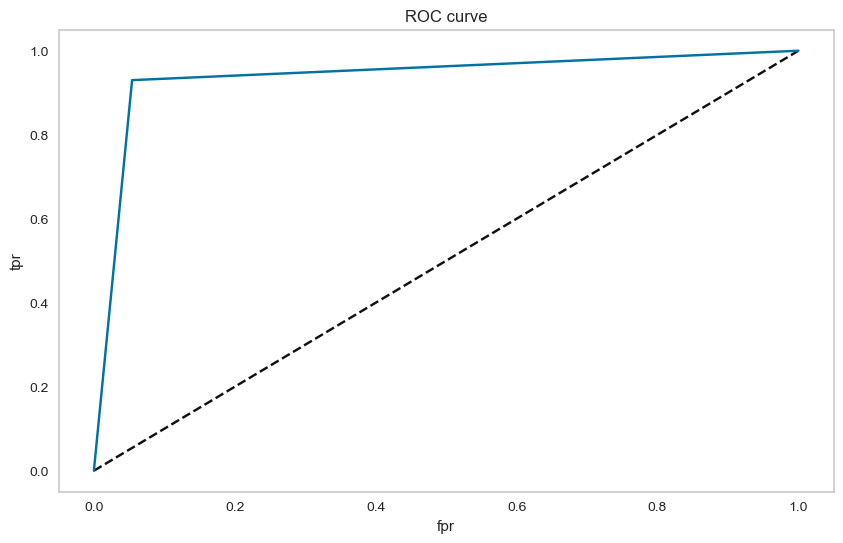

In [226]:
y_pred_proba = grid_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [227]:
roc_auc_score(y_test, y_pred_proba)

0.9378643845989839

In [228]:
average_precision_score(y_test, y_pred_proba)

0.8002978856517226

#### Prediction

375/375 [==============================] - 1s 1ms/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2286
           1       0.84      0.93      0.88       714

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.92      3000
weighted avg       0.95      0.94      0.94      3000


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9142
           1       0.87      0.93      0.90      2857

    accuracy                           0.95     11999
   macro avg       0.93      0.94      0.93     11999
weighted avg       0.95      0.95      0.95     11999



accuracy_test  f1_test  recall_test  precision_test  accuracy_train  \
ANN           0.94     0.88         0.93            0.84            0.95   

     f1_train  recall_train  precision_train  
ANN      0.90          0.93             0.87

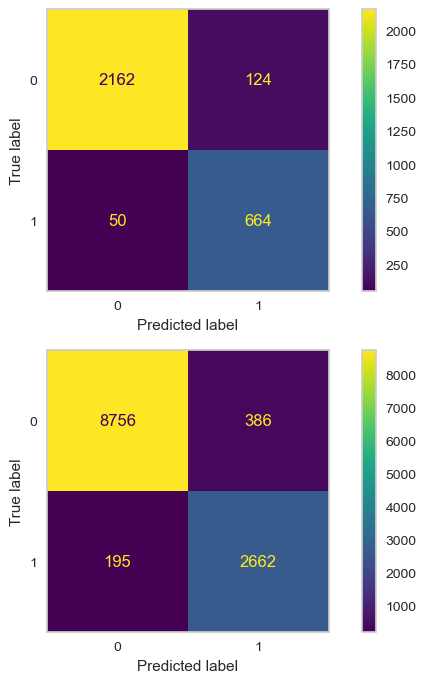

In [229]:
# # model = load_pipeline_keras('./churn_pred.h5', './scaler.pkl', './column_trans.pkl')
# model = grid_model

# out_score_ann = eval_metric_classification(
#     model, X_train, y_train, X_test, y_test, 
#     'ANN', ml_model=False, average=None, labels=[1]
# )
# out_score_ann

TEST
94/94 [==============================] - 0s 1ms/step
[[2162  124]
 [  50  664]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2286
           1       0.84      0.93      0.88       714

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.92      3000
weighted avg       0.95      0.94      0.94      3000

-------------------------------------------------------
TRAIN
375/375 [==============================] - 0s 1ms/step
[[8756  386]
 [ 195 2662]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9142
           1       0.87      0.93      0.90      2857

    accuracy                           0.95     11999
   macro avg       0.93      0.94      0.93     11999
weighted avg       0.95      0.95      0.95     11999

94/94 [==============================] - 0s 1ms/step


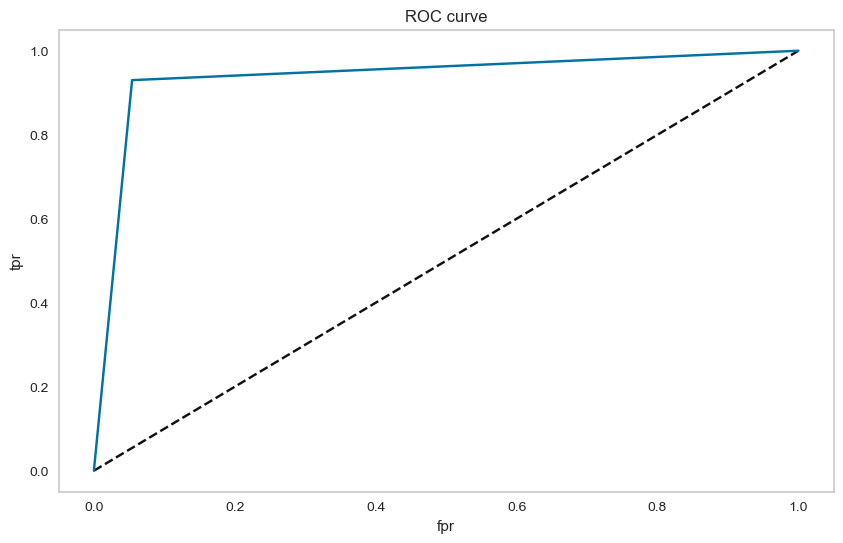

375/375 [==============================] - 1s 1ms/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2286
           1       0.84      0.93      0.88       714

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.92      3000
weighted avg       0.95      0.94      0.94      3000


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9142
           1       0.87      0.93      0.90      2857

    accuracy                           0.95     11999
   macro avg       0.93      0.94      0.93     11999
weighted avg       0.95      0.95      0.95     11999



accuracy_test  f1_test  recall_test  precision_test  accuracy_train  \
ANN           0.94     0.88         0.93            0.84            0.95   

     f1_train  recall_train  precision_train  
ANN      0.90          0.93             0.87

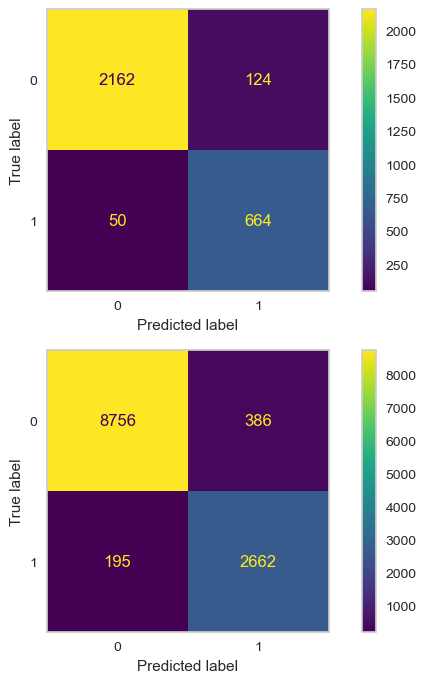

In [230]:
#### Evaluating Model Performance and Tunning

from sklearn.metrics import confusion_matrix, classification_report

print('TEST')
y_pred = grid_model.predict(X_test) >= 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------")
print('TRAIN')
y_train_pred = grid_model.predict(X_train) >= 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

#### ROC (Receiver Operating Characteristic Curve) and AUC (Area Under Curve) 

y_pred_proba = grid_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

roc_auc_score(y_test, y_pred_proba)

average_precision_score(y_test, y_pred_proba)

#### Prediction

# model = load_pipeline_keras('./churn_pred.h5', './scaler.pkl', './column_trans.pkl')
model = grid_model

out_score_ann = eval_metric_classification(
    model, X_train, y_train, X_test, y_test, 
    'ANN', ml_model=False, average=None, labels=[1]
)
out_score_ann

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [239]:
compare = pd.concat([
    out_score_svc,
    out_score_knn,
    out_score_rf,
    out_score_xgb,
    out_score_ann      
])
compare

accuracy_test  f1_test  recall_test  precision_test  \
SVC                     0.96     0.92         0.95            0.88   
KNN                     0.95     0.89         0.92            0.86   
Random Forest           0.98     0.97         0.95            0.98   
XGBoost                 0.98     0.96         0.97            0.94   
ANN                     0.95     0.89         0.92            0.86   

               accuracy_train  f1_train  recall_train  precision_train  
SVC                      0.98      0.96          0.98             0.94  
KNN                      0.95      0.90          0.91             0.90  
Random Forest            0.99      0.98          0.97             0.99  
XGBoost                  1.00      0.99          1.00             0.99  
ANN                      0.96      0.91          0.93             0.90

In [240]:
compare.to_csv('models_compare.csv')

#### Accuracy Comparison

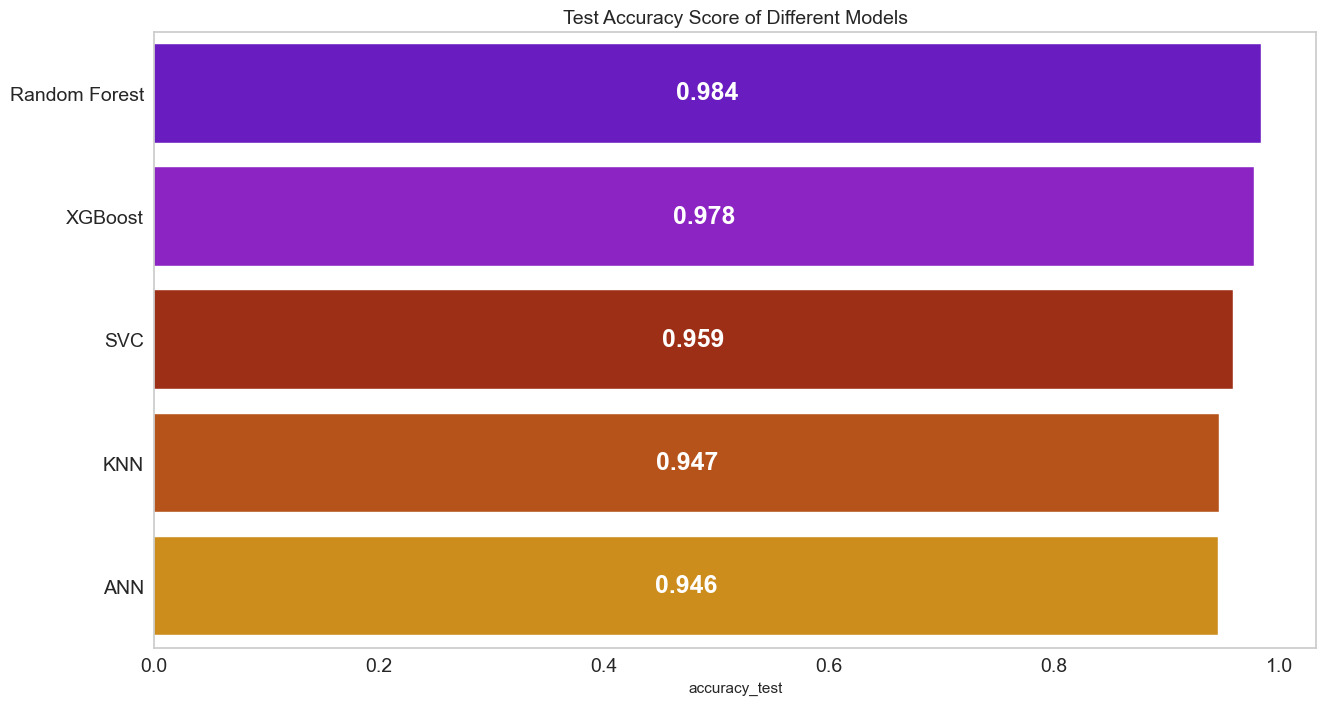

In [241]:
compare = compare.sort_values(by='accuracy_test', ascending=False)

plt.figure(figsize=(15,8))
ax = sns.barplot(x='accuracy_test', y=compare.index, data=compare.round(3), palette="gnuplot")
ax.bar_label(ax.containers[0], fontsize=18, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Accuracy Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

#### Recall Score Comparison

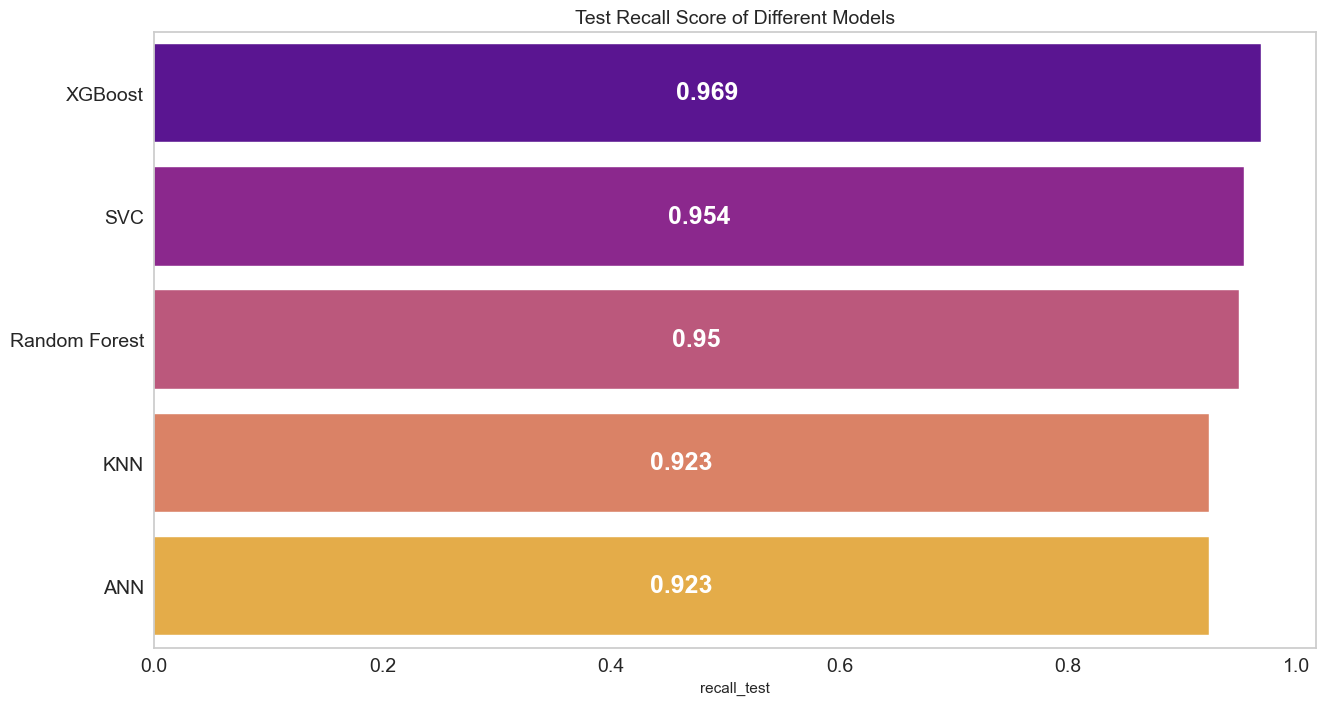

In [242]:
compare = compare.sort_values(by='recall_test', ascending=False)

plt.figure(figsize=(15,8))
ax = sns.barplot(x='recall_test', y=compare.index, data=compare.round(3), palette="plasma")
ax.bar_label(ax.containers[0], fontsize=18, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Recall Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

#### F1 Score Comparison

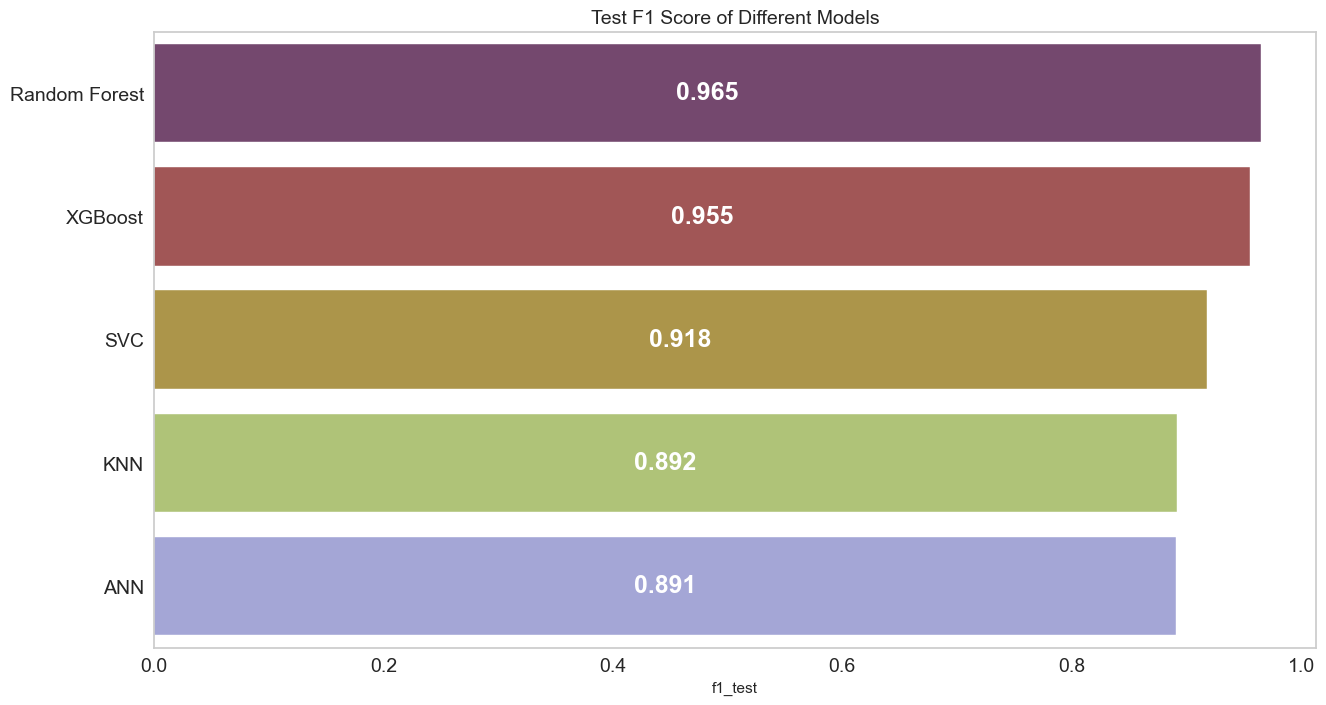

In [248]:
compare = compare.sort_values(by='f1_test', ascending=False)

plt.figure(figsize=(15,8))
ax = sns.barplot(x='f1_test', y=compare.index, data=compare.round(3), palette="tab20b_r")
ax.bar_label(ax.containers[0], fontsize=18, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test F1 Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

#### Precision Score Comparison

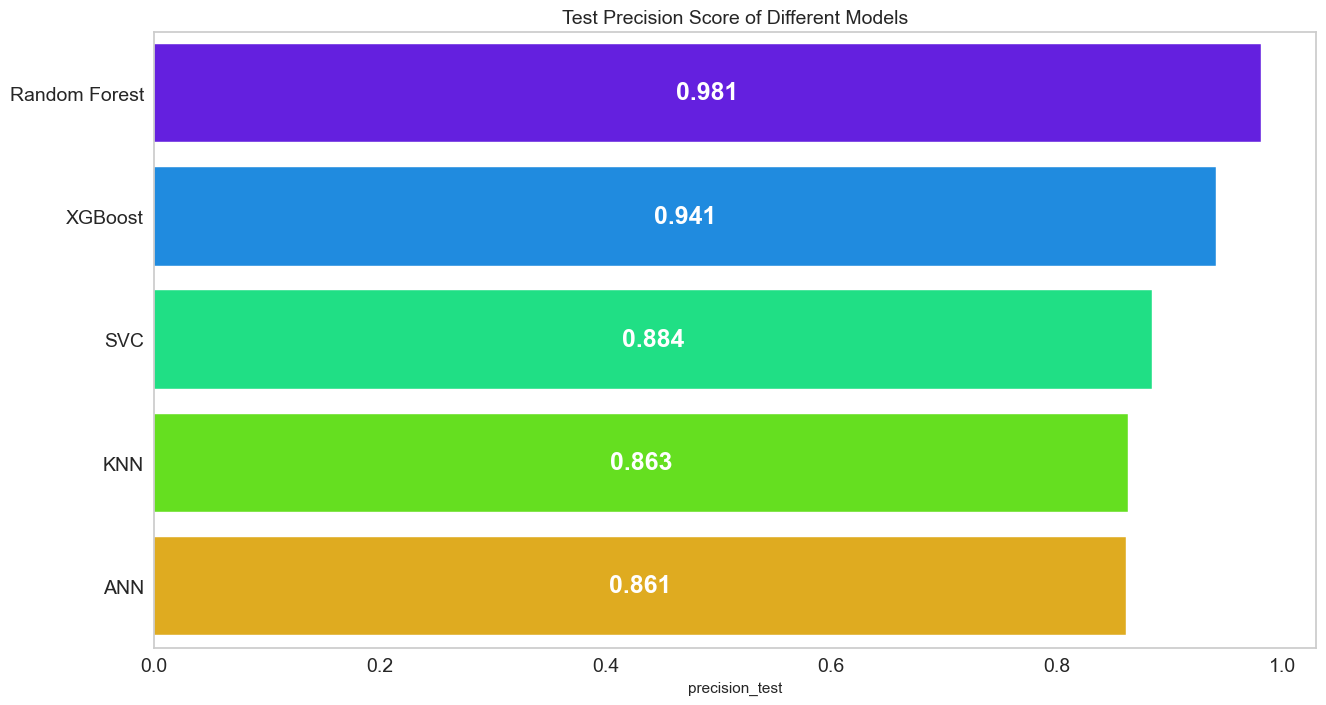

In [244]:
compare = compare.sort_values(by='precision_test', ascending=False)

plt.figure(figsize=(15,8))
ax = sns.barplot(x='precision_test', y=compare.index, data=compare.round(3), palette="gist_rainbow_r")
ax.bar_label(ax.containers[0], fontsize=18, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Precision Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

### Conclusion

**Accuracy :** The models with the highest three accuracy score is Random Forest, XGboost, and SVC models,respectively. We know that accuracy tells us how often we can expect our machine learning model will correctly predict an outcome out of the total number of times it made predictions.<br>
**Recall :** XGboost, SVC, and Random Forest models have the highest recall score, respectively. Remember that model recall score represents the model’s ability to correctly predict the positives out of actual positives.<br>
**F1-Score :** When we examine the F1 score values, Random Forest, XGboost, and SVC models have the highest three scores, respectively.<br>
**Precision :** The model with the highest three Precision score is Random Forest, XGboost, and SVC models,respectively. Note that the precision score can be used in the scenario where the machine learning model is required to identify all positive examples without any false positives.

> Since Random Forest is the best model in terms of both accuracy and f1 score, we will build our final model on Random Forest for this problem.

### Final Model

In [113]:
X = df.drop(columns="left")
y = df.left
X.shape, y.shape

((14999, 9), (14999,))

In [114]:
cat = X_train.select_dtypes("object").columns
cat

Index(['departments', 'salary'], dtype='object')

In [115]:
# defining column transformer object for tree based models without scaling, because these models doesn't need scaling

cat = X_train.select_dtypes("object").columns

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) 

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [116]:
# built a pipe model for Random Forest with default hyperparameter

operations= [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(n_estimators= 10,
                                                 class_weight="balanced", 
                                                 random_state=random_state,
                                                 criterion= 'gini',
                                                 max_depth= 10,
                                                 max_features= 'auto',
                                                 min_samples_leaf= 1,
                                                 min_samples_split= 2
                                                 ))
            ]

final_model = Pipeline(steps=operations)

In [117]:
final_model.fit(X,y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        max_features='auto', n_estimators=10,
                                        random_state=101))])

In [118]:
model = Pipeline(steps=operations)

scoring= ["accuracy", "f1", "recall", "precision"]

scores = cross_validate(model, X, y, scoring = scoring, cv = 5, return_train_score=True)
df_scores =  pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_f1  train_f1  \
0      0.12        0.02           0.99            0.99     0.98      0.97   
1      0.09        0.01           0.98            0.99     0.95      0.98   
2      0.09        0.02           0.98            0.99     0.95      0.98   
3      0.09        0.02           0.99            0.99     0.97      0.97   
4      0.10        0.02           0.98            0.99     0.97      0.97   

   test_recall  train_recall  test_precision  train_precision  
0         0.97          0.96            0.99             0.99  
1         0.92          0.96            0.99             0.99  
2         0.92          0.96            0.99             0.99  
3         0.96          0.95            0.99             0.99  
4         0.96          0.95            0.97             0.99

test_accuracy     0.98
train_accuracy    0.99
test_f1           0.96
train_f1          0.98
test_recall       0.95
train_recall      0.96
test_precision    0.98
train_precision   0.99
dtype: float64

> One of the most important features of Random Forest is that it gives information about feature importance. Now let's check if we can get our final model with close scores using less features using this feature.

#### Feature Importance for RF Final Model

In [135]:
final_model["RF_model"].feature_importances_

array([0.00783292, 0.00642034, 0.33623189, 0.10067883, 0.11089003,
       0.11488652, 0.31244262, 0.00977937, 0.00083748])

In [136]:
# features = list(X_train.select_dtypes("object").columns) + list(X_train.select_dtypes("number").columns)
# features

In [137]:
features = final_model['OrdinalEncoder'].get_feature_names_out()
features

array(['ordinalencoder__departments', 'ordinalencoder__salary',
       'remainder__satisfaction_level', 'remainder__last_evaluation',
       'remainder__number_project', 'remainder__average_montly_hours',
       'remainder__time_spend_company', 'remainder__work_accident',
       'remainder__promotion_last_5years'], dtype=object)

In [138]:
rf_feature_imp = pd.DataFrame(data = final_model["RF_model"].feature_importances_, index = features, #index=X.columns
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

Feature Importance
remainder__satisfaction_level                   0.34
remainder__time_spend_company                   0.31
remainder__average_montly_hours                 0.11
remainder__number_project                       0.11
remainder__last_evaluation                      0.10
remainder__work_accident                        0.01
ordinalencoder__departments                     0.01
ordinalencoder__salary                          0.01
remainder__promotion_last_5years                0.00

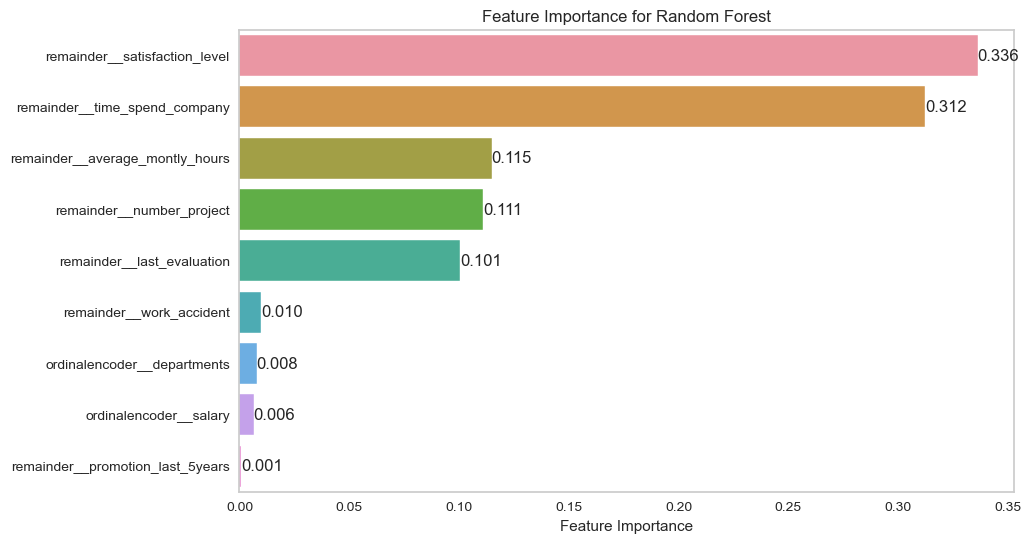

In [139]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

In [148]:
selected_features = rf_feature_imp.head().index.to_series().replace("remainder__","",regex=True).values
selected_features

array(['satisfaction_level', 'time_spend_company', 'average_montly_hours',
       'number_project', 'last_evaluation'], dtype=object)

In [149]:
X = X[selected_features]
X

satisfaction_level  time_spend_company  average_montly_hours  \
0                    0.38                   3                   157   
1                    0.80                   6                   262   
2                    0.11                   4                   272   
3                    0.72                   5                   223   
4                    0.37                   3                   159   
...                   ...                 ...                   ...   
14994                0.40                   3                   151   
14995                0.37                   3                   160   
14996                0.37                   3                   143   
14997                0.11                   4                   280   
14998                0.37                   3                   158   

       number_project  last_evaluation  
0                   2             0.53  
1                   5             0.86  
2                   7             0.88  
3                   5             0.87  
4                   2             0.52  
...               ...              ...  
14994               2             0.57  
14995               2             0.48  
14996               2             0.53  
14997               6             0.96  
14998               2             0.52  

[14999 rows x 5 columns]

In [150]:
final_model_imp = RandomForestClassifier(n_estimators= 10,class_weight="balanced", 
                     random_state=random_state,
                     criterion= 'gini',
                     max_depth= 10,
                     max_features= 'auto',
                     min_samples_leaf= 1,
                     min_samples_split= 2
)
final_model_imp.fit(X,y)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='auto', n_estimators=10, random_state=101)

In [151]:
model = RandomForestClassifier(n_estimators= 10,class_weight="balanced", 
                     random_state=random_state,
                     criterion= 'gini',
                     max_depth= 10,
                     max_features= 'auto',
                     min_samples_leaf= 1,
                     min_samples_split= 2
)

scoring= ["accuracy", "f1", "recall", "precision"]

scores = cross_validate(model, X, y, scoring = scoring, cv = 5, return_train_score=True)
df_scores =  pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_f1  train_f1  \
0      0.10        0.01           0.99            0.99     0.98      0.97   
1      0.09        0.02           0.98            0.99     0.96      0.98   
2      0.10        0.01           0.98            0.99     0.96      0.98   
3      0.10        0.01           0.99            0.99     0.97      0.97   
4      0.08        0.01           0.98            0.99     0.97      0.98   

   test_recall  train_recall  test_precision  train_precision  
0         0.96          0.96            0.99             0.99  
1         0.93          0.97            0.99             0.99  
2         0.93          0.97            0.99             0.99  
3         0.96          0.95            0.99             0.99  
4         0.96          0.96            0.97             0.99

test_accuracy     0.98
train_accuracy    0.99
test_f1           0.97
train_f1          0.98
test_recall       0.95
train_recall      0.96
test_precision    0.99
train_precision   0.99
dtype: float64

> We built the Random Forest model using 5 features instead of 9 and we got the same scores. That's why we got our results by building on the 5 features that have the greatest impact on our final model, taking into account the calculation cost.

## 6. Model Deployment

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model

In [152]:
import pickle
pickle.dump(final_model_imp, open("final_model_employee_churn", 'wb'))

In [153]:
loaded_final_model = pickle.load(open("final_model_employee_churn", "rb"))
loaded_final_model

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='auto', n_estimators=10, random_state=101)

#### Prediction

In [160]:
X.sample(10)

satisfaction_level  time_spend_company  average_montly_hours  \
10393                0.83                   2                   260   
4421                 0.59                   3                   198   
14553                0.90                   5                   232   
5528                 0.79                   3                   222   
7304                 0.78                   3                   252   
2870                 0.75                   3                   145   
2638                 0.69                   3                   229   
10793                0.61                   3                   176   
3358                 0.91                   3                   145   
13245                0.83                   2                   149   

       number_project  last_evaluation  
10393               3             0.77  
4421                4             0.98  
14553               5             1.00  
5528                4             0.71  
7304                3             0.78  
2870                4             0.79  
2638                5             0.61  
10793               4             0.56  
3358                4             0.57  
13245               2             0.52

In [161]:
X.describe().T

count   mean   std   min    25%    50%    75%    max
satisfaction_level   14999.00   0.61  0.25  0.09   0.44   0.64   0.82   1.00
time_spend_company   14999.00   3.50  1.46  2.00   3.00   3.00   4.00  10.00
average_montly_hours 14999.00 201.05 49.94 96.00 156.00 200.00 245.00 310.00
number_project       14999.00   3.80  1.23  2.00   3.00   4.00   5.00   7.00
last_evaluation      14999.00   0.72  0.17  0.36   0.56   0.72   0.87   1.00

In [162]:
new_obs = {"satisfaction_level": [0.63, 0.87],
           "last_evaluation": [0.45, 0.75],
           "number_project" : [4,6],
           "average_montly_hours" : [120,175],
           "time_spend_company": [3,5]
           }

In [163]:
samples = pd.DataFrame(new_obs)
samples

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.63             0.45               4                   120   
1                0.87             0.75               6                   175   

   time_spend_company  
0                   3  
1                   5

In [164]:
predictions = loaded_final_model.predict(samples)

In [165]:
samples["pred_pipe"] = predictions

In [166]:
samples

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.63             0.45               4                   120   
1                0.87             0.75               6                   175   

   time_spend_company  pred_pipe  
0                   3          1  
1                   5          0

In [173]:
predictions_proba = loaded_final_model.predict_proba(samples.iloc[:,:-1])
predictions_proba

array([[0.1, 0.9],
       [0.7, 0.3]])

### Streamlit Link

https://oznurkg-employee-churn-project-stream-employee-churn-app-y097cx.streamlit.app/

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___